In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy.optimize
from scipy import signal
%matplotlib inline


def to_hex(x, pos):
    return '0x%x' % int(x)

fmt = ticker.FuncFormatter(to_hex)


plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'

plt.rcParams['savefig.facecolor']='white'

# SIM ADC Input

In [182]:
import numpy as np

import random


par_names = ['tfast', 'tslow','rfast', 'rslow']

def IsG(t, par):
    amp, tfast, tslow = par
    tslow = max(tfast*1.1, tslow)
    Islow = (np.exp(-t/tslow))
    Ifast = (1-np.exp(-t/tfast))
    # IsG = Ifast
    IsG = amp*(Islow + Ifast-1)
    return np.where(t < 0, 0, IsG) #IsG if t>0 else 0 

ADC_bits = 12
ADC_smpls = 128
# ADC_smpls = 80
# ADC_smpls = 248

# ADC_bits = 8
# ADC_smpls = 32

ADC_MAX  = 2**ADC_bits - 1
ADC_ZERO = 2**(ADC_bits-1) - 0
ADC_MIN = 0

trace0 = [ int(ADC_ZERO) ]* ADC_smpls



def SiPM_ADC():
    chrg = random.uniform(0.1,1)
    amp =  chrg * (ADC_MAX-ADC_ZERO) * 1.3
    par = [amp,4*random.uniform(0.6,1.5),14*chrg*random.uniform(0.2,1.4)]
    Dx = np.linspace(-1,ADC_smpls-2,ADC_smpls)
    Dy = IsG(Dx,par) + ADC_ZERO
    Dx = Dx - Dx[0]
    Dy = np.digitize(Dy, np.arange(1,ADC_MAX+1))
    return Dx, Dy

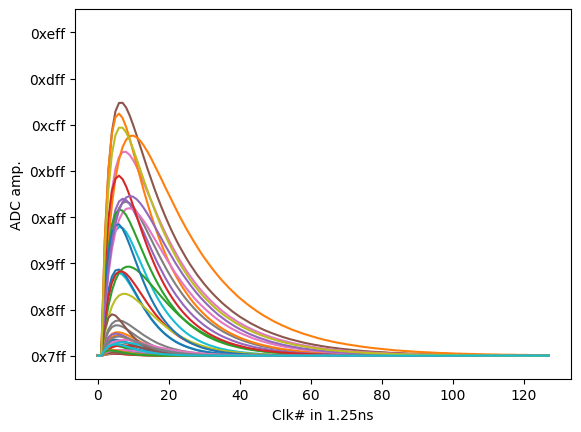

In [183]:
for i in range(50):
    plt.plot(*SiPM_ADC())
plt.xlabel("Clk# in 1.25ns")
plt.ylabel("ADC amp.")
plt.ylim([2048-128,4096-128])
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(ADC_MAX/16))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)


In [184]:
def DoubleSiPM_ADC():
    x,y = SiPM_ADC()
    xnew = np.random.randint(5,30)
    ynew = SiPM_ADC()[1]
    y[ xnew: ] += ynew[:len(x)-xnew] - + ADC_ZERO
    return x,y

In [185]:
ds = [ DoubleSiPM_ADC() for i in range(20) ]

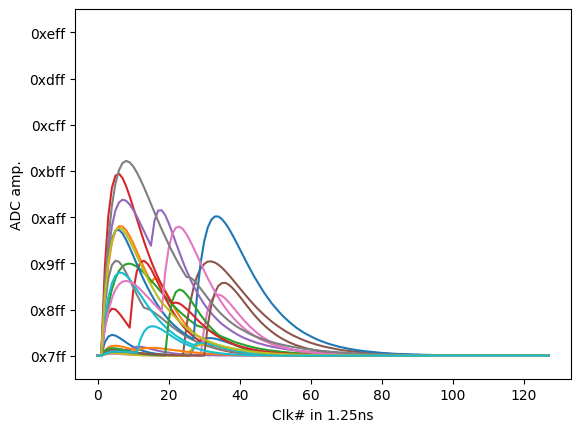

In [186]:
for i in range(20):
    plt.plot(*ds[i])

plt.xlabel("Clk# in 1.25ns")
plt.ylabel("ADC amp.")
plt.ylim([2048-128,4096-128])
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(ADC_MAX/16))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)

In [187]:
def uint12_to_therm(values, num_bins = 16):
    values = np.asarray(values, dtype=np.uint16)
    thresholds = np.arange(0,2**11,2**11/num_bins) # 2**11+1 for endpoint
    thermometer = (values[:, None] > thresholds).astype(np.uint8)
    return thermometer#, thresholds, values


def SiPM_inp(): # Therm Code
    x,y = SiPM_ADC()
    return np.ravel( uint12_to_therm( y + 128 - ADC_ZERO ) )


def Nois(t, par):
    amp, tfast = par
    Ifast = (np.cos(-t/tfast))
    v = amp*(Ifast)
    return np.where(t < 0, 0, v) 


def Nois_ADC():
    chrg = random.uniform(0.8,1)
    amp =  chrg * (ADC_MAX*0.01)
    par = [amp,0.001*chrg*random.uniform(1.0,1.4)]
    Dx = np.linspace(-1,ADC_smpls-2,ADC_smpls)
    Dy = Nois(Dx,par) + ADC_ZERO
    Dx = Dx - Dx[0]
    Dy = np.digitize(Dy, np.arange(1,ADC_MAX+1))
    return Dx, Dy


def Nois_inp(): # Therm
    x,y = Nois_ADC()
    return np.ravel( uint12_to_therm( y + 128 - ADC_ZERO ) )

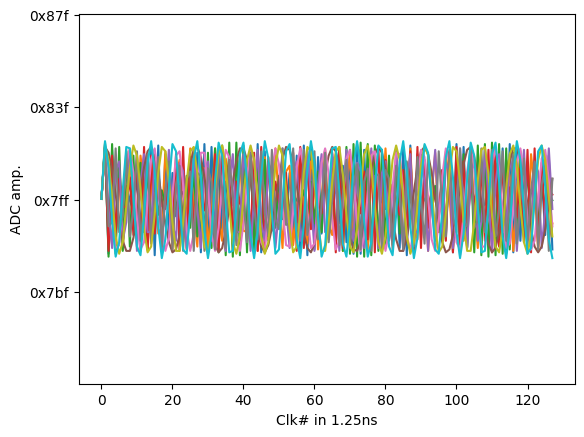

In [188]:
for i in range(10):
    plt.plot(*Nois_ADC())

plt.xlabel("Clk# in 1.25ns")
plt.ylabel("ADC amp.")
plt.ylim([2048-128,2048+128])
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(ADC_MAX/64))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)


In [189]:
chrg = 0.1
amp =  chrg * (ADC_MAX-ADC_ZERO) * 1.3
par = [amp,4,14*chrg*random.uniform(1.0,1.4)]
Dx = np.linspace(-1,ADC_smpls-1,500)
np.int16( IsG(Dx,par) )


array([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [190]:
SiPM_ADC()

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127.]),
 array([2048, 2048, 2081, 2104, 2118, 2126, 2130, 2130, 2128, 2124, 2119,
        2114, 2109, 2103, 2098, 2093, 2088, 2084, 2080, 2076

In [191]:
def uint12_to_redint7(values, num_bits = 7):
    offset = np.clip( np.asarray(values, dtype=np.uint16) + 128 - ADC_ZERO ,0,ADC_MAX - ADC_ZERO)
    red = np.right_shift( offset,(12-num_bits-1))
    return red 

# uint12_to_redint7(np.array([SiPM_ADC() for i in range(10)]))

uint12_to_redint7( [SiPM_ADC()[1]  for i in range(10)] )


array([[ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8, 10, ...,  8,  8,  8],
       [ 8,  8, 22, ...,  8,  8,  8],
       ...,
       [ 8,  8, 16, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8, 28, ...,  8,  8,  8]], dtype=uint16)

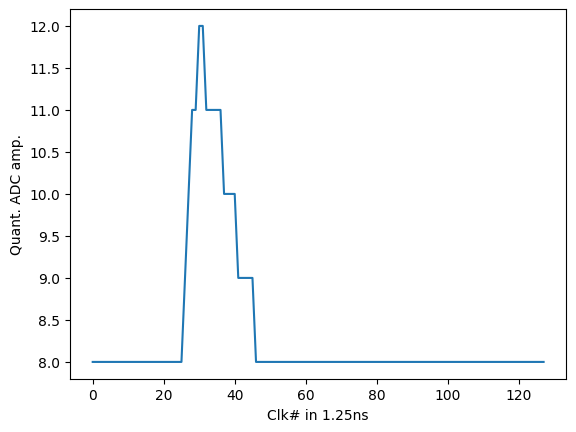

In [192]:
# for i in range(1):
plt.plot(ds[0][0],uint12_to_redint7(ds[8][1]))
uint12_to_redint7
plt.xlabel("Clk# in 1.25ns")
plt.ylabel("Quant. ADC amp.")
# plt.ylim([2048-128,4096-128])
# plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(ADC_MAX/16))
# plt.gca().get_yaxis().set_major_formatter(fmt)
plt.gcf().patch.set_alpha(0.0)

In [193]:
np.asarray([0,ADC_ZERO, ADC_MAX], dtype=np.uint16)+ 128 - ADC_ZERO

array([63616,   128,  2175], dtype=uint16)

In [194]:
# MAX sum
uint12_to_redint7(ADC_MAX)

127

In [195]:
def SiPM_inp():
    return uint12_to_redint7( SiPM_ADC()[1] )

def Nois_inp():
    return uint12_to_redint7( Nois_ADC()[1] )
def Nois_inp():
    return uint12_to_redint7( DoubleSiPM_ADC()[1] )

In [196]:
SiPM_lbl = "Good"
Nois_lbl = "Ugly" # "Double"



In [197]:
uint12_to_redint7(ADC_MAX)

127

In [198]:

def rand_inp():
    # return np.array(list(np.binary_repr(random.getrandbits( N ), width=N)), dtype=np.uint8) 
    # return SiPM_inp()
    return np.random.randint(low=uint12_to_redint7(ADC_ZERO), high=uint12_to_redint7(ADC_MAX), size=ADC_smpls)

rand_inp()

array([101,  74,  26,  74,  74, 110, 117,  68,  62,  66,   8,  23,  75,
        35, 104, 111,  38,  42,  11,  69,  19,  48, 102,  41,  25, 103,
        88,  93,  82, 125,  22,  93, 107,  34,  35,  89,  58,  32,  45,
        69,  74,  62,  39, 118,  66,  30,  57,  35, 101,  45, 101,  31,
        40,  70,  11,  80,  70, 119, 118,  36,  60, 123,  92,  72,  42,
        35,  56,  70,  71,  34,  63, 104,  19,  44,  64,  14,  99,  73,
        52,  87,  41,  15,  16, 118, 104,  81,  25, 116,  94, 112,  89,
        54,  55,  97,  51,  94,  53,  50,  40,  14,  88,  35,  68,   9,
        75,  59,  41,  51,  59,  96,  83,  98,  48,  41,  60,  90, 126,
       111,  89,  12,  14, 110,  58, 107,  73,  95,  35,  81])

In [20]:
# def SiPM_ADC(): # Debug
#     Dx = np.linspace(-1,ADC_smpls-2,ADC_smpls)
#     Dy = np.zeros_like(Dx)
#     Dy[Dx >= 64] = ADC_ZERO
#     Dy[Dx < 64] = ADC_MAX
#     # Dx = Dx - Dx[0]
#     Dy = np.digitize(Dy, np.arange(1,ADC_MAX+1))
#     return Dx, Dy

# def Nois_ADC(): # Debug
#     Dx = np.linspace(-1,ADC_smpls-2,ADC_smpls)
#     Dy = np.zeros_like(Dx)
#     Dy[Dx >= 64] = ADC_MAX
#     Dy[Dx < 64] = ADC_ZERO
#     # Dx = Dx - Dx[0]
#     Dy = np.digitize(Dy, np.arange(1,ADC_MAX+1))
#     return Dx, Dy

# def SiPM_inp(): # Debug
#     return np.array([0,1])

# def Nois_inp(): # Debug
#     return np.array([1,0])


# print( list(SiPM_inp()) )

# Define NN

In [1070]:
# in bit

inp_len = 7
neur_len = 2
# bias_len = 2
bias_len = 0
wght_len = 2

inp_max = np.uint16((1 << inp_len) - 1)


### Therm
# NN = (8, 10, 10, 4);
# NN = (10, 100, 100, 5);
# NN = (32, 64, 16, 4);
# NN = (128, 64, 32, 4);
# NN = (1024, 64, 4);
# NN = (2048, 64, 32, 4);
# NN = (8, 16, 32, 4);
# NN = (2048, 8, 64, 2); 
# NN = (2048, 4 ,2);
# NN = (2, 8, 2);
# NN = (2, 2);

### RedInt
NN = (ADC_smpls, 32, 128, 2);
NN = (ADC_smpls, 8, 32, 2);
NN = (ADC_smpls, 64, 2);
NN = (ADC_smpls, 64, 128, 2);
# NN = (ADC_smpls, 2);

# NN = (8192*128, 64, 64, 4);
# NN = (1200, 3000, 100, 4);

keep_l = [None]*len(NN)
# keep_l = (True, True, True, True)
# keep_l = (True, False, False, True)
# keep_l = (False, False, False, False)
# keep_l = (False, False, False)
# keep_l = (False, False)


In [1071]:
NNdescr = "Good_vs_Double"

In [1072]:
NNstr = NNdescr + " Net: " + "-".join(map(str,NN)) + f", (inp,neur,wght) bits: ({inp_len},{neur_len},{wght_len})"

NNstr

'Good_vs_Double Net: 128-64-128-2, (inp,neur,wght) bits: (7,2,2)'

In [1073]:
NNfile = NNdescr + "_NN_" + "-".join(map(str,NN)) + f"__inp-neur-wght_bits__{inp_len}-{neur_len}-{wght_len}"
NNfile

'Good_vs_Double_NN_128-64-128-2__inp-neur-wght_bits__7-2-2'

# Make Indi

In [1074]:
np.random.binomial(1, 0.1)

0

In [1079]:
npNN = np.array(NN)
# npSegm = np.cumsum( np.concatenate( [[0], npNN[:-1]* npNN[1:] * wght_len, npNN[1:] * bias_len] ) )
npSegm = np.cumsum( np.concatenate( [[0], npNN[:-1]* npNN[1:] * wght_len ]) )

def rand_indi_custom(p,npSegm=npSegm):
    return np.random.binomial(1, p, size=npSegm[-1])

def rand_indi_segmented(ps):
    arr = np.asarray(ps)
    current_length = len(arr)
    target_length = len(NN)
    if current_length >= target_length:
        ps = arr[:target_length]
    else:
        last_element = arr[-1]
        extension = np.full(target_length - current_length, last_element)
        ps = np.concatenate([arr, extension])
    return np.concatenate( [  np.random.binomial(1, ps[s], size=(npSegm[s+1]-npSegm[s])) for s in range(len(NN)-1)  ] )
        
    
def rand_indi():
    return rand_indi_custom(0.05)
def zero_indi():
    return np.zeros(npSegm[-1])

indi = rand_indi()

npSegm , len(npNN) , len(indi), len(zero_indi()), indi[:10]

(array([    0, 16384, 32768, 33280]),
 4,
 33280,
 33280,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [1080]:
list( zip( npSegm [:len(npNN)+1],  npSegm [1:len(npNN)] ) )

[(0, 16384), (16384, 32768), (32768, 33280)]

In [1026]:
npSegm, len(rand_indi())

(array([  0, 512]), 512)

In [1027]:
def conv_from_indi_to_wght(indi):
    # arr =  np.array( indi ).astype(np.int8) *2 -1
    # iwght = [] 
    # for i,s in enumerate( zip( npSegm [:len(npNN)+1],  npSegm [1:len(npNN)] ) ):
    #     iwght.append( arr[slice(*s)].reshape(npNN[i+1], npNN[i]) )
    # return iwght
    arr =  np.array( indi ).astype(np.int8)
    wghtlist = [] 
    for i,s in enumerate( zip( npSegm [:len(npNN)+1],  npSegm [1:len(npNN)] ) ):
        # print(i,s)
        # iwght = arr[slice(*s)].reshape([2,max(npNN[i+1], npNN[i]),min(npNN[i+1], npNN[i])])
        iwght = arr[slice(*s)].reshape([npNN[i+1], npNN[i],2])
        # print(iwght)
        iwght_2bit = (iwght[:,:,0]) | (iwght[:,:,1] << 1)
        # print(iwght, iwght_2bit)
        wghtlist.append(iwght_2bit)
    return wghtlist
    # arr =  np.array( indi ).astype(np.int8) 
    # biaslist = [] 
    # for i,s in enumerate( zip( npSegm [len(npNN)-1:-1],  npSegm [len(npNN):] ) ):
    #     biasi = arr[slice(*s)].reshape(npNN[i+1],2)
    #     biasi = (biasi[:,0]) | (biasi[:,1] << 1)
    #     biaslist.append( biasi )
    # return biaslist

indi = rand_indi()
[i.shape for i in conv_from_indi_to_wght(indi)], conv_from_indi_to_wght(indi)

# def conv_int_bits(ndarrlist, bits: np.int8):
#     # arr = np.asarray(ndarrlist)

#     if bits <= 1:
#         return ndarrlist
#     elif bits >= 2:
#         shifts = np.arange(bits-1, -1, -1)
#         print(shifts)
#         # return [np.column_stack([(a >> 2) & 1,(a >> 1) & 1, a & 1]).astype(np.uint8) for a in ndarrlist ]
#         return [[(a >> i) & 1 for i in shifts] for a in ndarrlist]
#         return (ndarrlist[:, None] >> shifts) & 1    
#     #     return [np.column_stack([(a >> 1) & 1, a & 1]) for a in ndarrlist ]
#     # elif bits == 3:
#     #     return [np.column_stack([(a >> 2) & 1,(a >> 1) & 1, a & 1]) for a in ndarrlist ]
        
# conv_int_bits(rand_NNbias(), bias_len), conv_int_bits(rand_NNwgth(), wght_len)

([(2, 128)],
 [array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
          2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
          0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)])

In [1028]:
npSegm, npSegm[len(npNN):]

(array([  0, 512]), array([], dtype=int64))

In [1029]:
# NNsummap = [(int(NN[L]*3*1/4) , int(NN[L]*3*1/2) , int(NN[L]*3*3/4)) for L in range(0,len(NN)-1)] 
# print(NNsummap)


In [1030]:
uint12_to_redint7(ADC_MAX), uint12_to_redint7(ADC_ZERO)

(127, 8)

In [1031]:
def conv_from_indi_to_summap(indi):
    summap = []
    for i in range(0,len(NN)-1):
        nonzwght = (npNN[i] - np.uint8(conv_from_indi_to_wght(indi)[i] == 0).sum(axis = 1))
        # print(nonzwght)
        if i==0:
            summap.append( np.uint32( nonzwght[:,np.newaxis] * [0.25, 0.5, 0.75] * (uint12_to_redint7(ADC_MAX)-uint12_to_redint7(ADC_ZERO)) *1) )
        else:
            summap.append( np.uint32( nonzwght[:,np.newaxis] * [0.5, 1.5, 2.5]) )
    return summap

conv_from_indi_to_summap(indi)

[array([[ 357,  714, 1071],
        [ 327,  654,  981]], dtype=uint32)]

In [1032]:
s, n = gen_Data(1000)
for f in [0,1,2,3]:
    c = CAM_inp(np.concatenate([s,n]), f)
    print(c.sum(axis=1).mean(),c.sum(axis=1).mean()-c.sum(axis=1).std(),c.sum(axis=1).mean()+c.sum(axis=1).std())
# np.mean([np.sum(SiPM_inp()) for i in range(1000)]), np.std([np.sum(SiPM_inp()) for i in range(1000)]), np.mean([np.sum(Nois_inp()) for i in range(1000)]), np.std([np.sum(Nois_inp()) for i in range(1000)]), np.mean([np.sum(rand_inp()) for i in range(1000)]), np.std([np.sum(rand_inp()) for i in range(1000)]), 

0.0 0.0 0.0
14868.761386138614 14372.848055825507 15364.674716451722
1387.238613861386 891.3252835482788 1883.1519441744933
2755.8465346534654 1814.627728633939 3697.0653406729916


# CAM_inp_scalar?

In [1033]:
NNsummap = conv_from_indi_to_summap(indi)

# Generate NN parameters

In [1034]:
Ws = [NN[i]*NN[i+1] for i in range(len(NN)-1)]
Bs = [NN[i] for i in range(1,len(NN))] # Max 0..3 * N_inputs
print("Weights: ",Ws, ", Biases: ", Bs)

NNbits = sum(Ws) * wght_len + sum(Bs) * bias_len
print(NNbits)

Weights:  [256] , Biases:  [2]
512


In [1035]:
indi = rand_indi_custom(0.1)

In [1036]:
NNwgth = conv_from_indi_to_wght(indi)
# NNbias = conv_from_indi_to_bias(indi)
NNsummap = conv_from_indi_to_summap(indi)
# del rand_NNwgth
# del rand_NNbias


# Python NN Forward calc 

In [906]:
# in bit
# neur_len = 2
# bias_len = 2
# wght_len = 1

# NN = (1024, 64, 32, 4);


In [40]:
verbose = False


In [41]:
import time

# def compress_array_to_str(arr):
#     from collections import Counter
#     counts = Counter(arr)
#     compressed_str = ','.join([f'{elem}:{count}' if count>1 else f'{elem}' for elem, count in counts.items()])
#     return compressed_str


# def compress_array_to_str(arr):
#     def encode_row(row):
#         out = []
#         prev, count = row[0], 1
#         for x in row[1:]:
#             if x == prev:
#                 count += 1
#             else:
#                 if count == 1:
#                     out.append(f"{prev}")
#                 else:
#                     out.append(f"{prev}:{count}")
#                 prev, count = x, 1
#         out.append(f"{prev}:{count}")
#         return ",".join(out)
#     if type(arr[0]) != np.ndarray:
#     # if np.array(arr).ndim == 1:
#         return  encode_row(arr)
#     else:
#         return ";".join(encode_row(row) for row in arr)
    
#     # out = []
#     # prev = arr[0]
#     # count = 1
#     # for x in arr[1:]:
#     #     if x == prev:
#     #         count += 1
#     #     else:
#     #         if count==1:
#     #             out.append(f"{prev}")
#     #         else:
#     #             out.append(f"{prev}:{count}")
#     #         prev, count = x, 1
#     # out.append(f"{prev}:{count}")
#     # return ",".join(out)

# compress_array_to_str(indi), \
# compress_array_to_str(conv_from_indi_to_wght(indi))

In [42]:
if type(conv_from_indi_to_wght(indi)[0]) == np.ndarray:
    print(1)

1


In [43]:
# ----------------------------------------------------------------------
# LUT that implements the 4×4 bias‑addition table
#   a = neuron sum (0‑3)   b = bias (0‑3)
#   out = a + b  (saturated at 3)
# ----------------------------------------------------------------------
_CAM_LUT = np.array([ # with input 0, 1, 2 ,3
    3, 2, 1, 0,   # bias = 0, n = 0..3
    0, 0, 1, 2,   # bias = 1, n = 0..3
    0, 1, 2, 3,   # bias = 2, n = 0..3
    1, 2, 3, 3    # bias = 3, n = 0..3
], dtype=np.uint8)          # shape (16,)

_CAM_LUT = np.array([ # with input 0, 1, 2 ,3
    0, 0, 0, 0,   # wght = 0, n = 0..3 => Block
    0, 1, 2, 3,   # wght = 1, n = 0..3 => Pass
    1, 2, 3, 3,   # wght = 2, n = 0..3 => Inc
    3, 2, 1, 0,   # wght = 3, n = 0..3 => Neg
], dtype=np.uint8)          # shape (16,)

# _BiasInput_LUT = np.array([ # with input 0, 1, 2 ,3
#     0, 0,   # bias = 0 Blk, n = 0..1
#     1, 0,   # bias = 1 Neg, n = 0..1
#     0, 1,   # bias = 2 Pas, n = 0..1
#     1, 1,   # bias = 3 Inc, n = 0..1
# ], dtype=np.uint8)          # shape (16,)

def CAM_neur(neur: np.ndarray, wght: np.ndarray) -> np.ndarray: 
    # The index into the 4‑bit LUT is   idx = a*4 + b  == (a << 2) | b
    idx = (wght << 2) | neur          # still uint8, range 0‑15
    return _CAM_LUT[idx]            # vectorised lookup, result shape = (n_next,)

# def bias_input(inp: np.ndarray, bias: np.ndarray) -> np.ndarray: 
#     # Inputs: vectors of a and b in [0..3]
#     a = np.array(inp, dtype=np.uint8)
#     b = np.array(bias, dtype=np.uint8)

#     # Both a and b are 1‑D arrays of the same length (n_next).
#     # The index into the 4‑bit LUT is   idx = a*4 + b  == (a << 2) | b
#     idx = (bias << 1) | inp          # still uint8, range 0‑15
#     return _BiasInput_LUT[idx]            # vectorised lookup, result shape = (n_next,)

In [44]:
[ CAM_neur(np.array([0,1,2,3]), wght) for wght in np.array([[0,0,0,0],[1,1,1,1],[2,2,2,2],[3,3,3,3]])] 

[array([0, 0, 0, 0], dtype=uint8),
 array([0, 1, 2, 3], dtype=uint8),
 array([1, 2, 3, 3], dtype=uint8),
 array([3, 2, 1, 0], dtype=uint8)]

In [45]:
np.bitwise_not(0, dtype=np.uint16)

65535

In [46]:
import numpy as np
import timeit

x = np.random.randint(0,127, size=100, dtype=np.uint16)

def clipped_multiplication_tmp(x):
    tmp = np.multiply(x, 2)
    result = np.clip(tmp, 0, 127)
    return result

def clipped_multiplication_clip(x):
    return np.clip(x * 2, 0, 127)

def clipped_multiplication_min_max(x):
    return np.minimum(x << 1, 127)

def mx(x):
    tmp = x<<1#np.bitwise_not(x)        # ~x
    # tmp = np.add(tmp, 1, dtype=dtype)             # ~x + 1
    result = np.bitwise_and(tmp, inp_max)   # (& mask)
    return result

print("Temporary array approach:", timeit.timeit(lambda: clipped_multiplication_tmp(x), number=100))
print("Clip function approach:", timeit.timeit(lambda: clipped_multiplication_clip(x), number=100))
print("Min-Max function approach:", timeit.timeit(lambda: clipped_multiplication_min_max(x), number=100))
print("Min-Max function approach:", timeit.timeit(lambda: mx(x), number=100))
clipped_multiplication_min_max(x)

Temporary array approach: 0.0005057891830801964
Clip function approach: 0.0004902761429548264
Min-Max function approach: 0.0003001871518790722
Min-Max function approach: 0.00023693684488534927


array([127,  30,  86, 118,  66,   6, 127, 127, 118,  36,  52, 100, 127,
       106,  94, 127, 127,  88,  62,  24, 126, 126,  58,  26, 127, 127,
        72, 127, 127,  22, 124, 127, 127, 127, 127, 127, 116, 104,   4,
        84,  66, 110,  66,  24, 127,  34,  88,  76, 127,  86,  90,  12,
       127, 127, 127, 127, 126, 127,  52, 127, 127,  10,   0, 127,  78,
        98, 127, 127,  32,  86,  36, 127, 127, 127,  28, 127, 127,  62,
       127, 127, 127, 127, 127,  12, 110, 114, 127, 127,   6, 127,  82,
        32, 127, 127, 127,  52, 110,  80, 127, 122], dtype=uint16)

In [47]:
np.uint16((1 << inp_len ) - 1)

127

In [1045]:
dtype = np.uint16

def blk(inp):
    return np.zeros_like(inp)#, dtype=dtype)

def pas(inp):
    x = np.array(inp)#, dtype=dtype)
    return x

def inc(inp):
    x = np.array(inp)#, dtype=dtype)
    # return np.clip(x * 2, 0, 127)
    return np.minimum(x << 1, np.uint16((1 << inp_len ) - 1))

def neg(inp, bits=7):
    x = np.array(inp)
    tmp = np.bitwise_not(x)        # ~x
    # tmp = np.add(tmp, 1, dtype=dtype)             # ~x + 1
    result = np.bitwise_and(tmp, inp_max)   # (& mask)
    return result

case4 = {0: blk, 1: pas, 2: inc, 3: neg}
# case4 = {0: blk, 1: neg, 2: pas, 3: inc}


def CAM_inp_scalar(inp, wght):
    return case4[wght](inp)

CAM_inp = np.vectorize(CAM_inp_scalar)

inp = SiPM_inp()
[CAM_inp(inp,i) for i in [0,1,2,3]]
# CAM_inp(inp,[0,1,2,3])

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16),
 array([ 8,  8,  9,  9, 10, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10,  9,  9,
         9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8, 

In [1046]:
%load_ext line_profiler
%lprun -f blk blk(rand_inp())


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 1.5605e-05 s
File: /tmp/ipykernel_2241216/1614023301.py
Function: blk at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def blk(inp):
     4         1      15605.0  15605.0    100.0      return np.zeros_like(inp)#, dtype=dtype)

In [1047]:
%load_ext line_profiler
%lprun -f pas pas(rand_inp())



The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 4.776e-06 s
File: /tmp/ipykernel_2241216/1614023301.py
Function: pas at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def pas(inp):
     7         1       4289.0   4289.0     89.8      x = np.array(inp)#, dtype=dtype)
     8         1        487.0    487.0     10.2      return x

In [1048]:
%load_ext line_profiler
%lprun -f inc inc(rand_inp())


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 1.8742e-05 s
File: /tmp/ipykernel_2241216/1614023301.py
Function: inc at line 10

Line #      Hits         Time  Per Hit   % Time  Line Contents
    10                                           def inc(inp):
    11         1       3092.0   3092.0     16.5      x = np.array(inp)#, dtype=dtype)
    12                                               # return np.clip(x * 2, 0, 127)
    13         1      15650.0  15650.0     83.5      return np.minimum(x << 1, np.uint16((1 << inp_len ) - 1))

In [1049]:
%load_ext line_profiler
%lprun -f neg neg(rand_inp())


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 1.2665e-05 s
File: /tmp/ipykernel_2241216/1614023301.py
Function: neg at line 15

Line #      Hits         Time  Per Hit   % Time  Line Contents
    15                                           def neg(inp, bits=7):
    16         1       3290.0   3290.0     26.0      x = np.array(inp)
    17         1       2571.0   2571.0     20.3      tmp = np.bitwise_not(x)        # ~x
    18                                               # tmp = np.add(tmp, 1, dtype=dtype)             # ~x + 1
    19         1       6294.0   6294.0     49.7      result = np.bitwise_and(tmp, inp_max)   # (& mask)
    20         1        510.0    510.0      4.0      return result

In [1050]:
indi = np.zeros(npSegm[-1])
indi = rand_indi()
indi[0] = 1
wght = conv_from_indi_to_wght(indi)[0]
print(wght)

# np.apply_along_axis(func1d=CAM_neur, axis=1, arr=np.array([[0,0],[0,1],[1,0],[1,1]]), wght=wght)



[[1 0 0 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2
  0 0 0 0 0 0 0 1 0 0 2 0 0 1 0 0 0 0 0 0]]


In [1052]:
wght = conv_from_indi_to_wght(indi)[0]
# CAM_neur(np.array([0,1,0,2]), wght)

### Calc Layer

In [55]:
(np.array([0,1,2,3])>=2).astype(np.uint8)

array([0, 0, 1, 1], dtype=uint8)

In [56]:
import time

def layer_inp(input_i):
    # return np.uint8(input_i+1)
    return np.uint8(input_i)

def output_o(layer_nL):
    return (layer_nL>=2).astype(np.uint8)
    # bit0 = layer_nL & 1
    # bit1 = (layer_nL >> 1) & 1
    # # Interleave: [bit0[0], bit1[0], bit0[1], bit1[1], ...]
    # zipped = np.empty(bit0.size * 2, dtype=bit0.dtype)
    # zipped[0::2] = bit0
    # zipped[1::2] = bit1
    # return zipped



# def calc_layer_old(layer_pre, layer_pre_idx, NNwgth, NNbias, NNsummap):
#     layer_nN_sum = np.clip(  # calc next layer n+1
#         np.add( # weigh neuron value (0..3) up or down (-1;1) 
#             # NNwgth_calc, # weights n -> n+1
#             NNwgth[layer_pre_idx+0],  # weights n -> n+1
#             np.broadcast_to( # same input for all NN[n+1] next layer neurons
#                 layer_pre, (NN[layer_pre_idx+1],NN[layer_pre_idx])
#             ).reshape(1,-1)  # broadcast_to returns a NxM view, but we need 1d
#             , dtype=np.int8)
#         , 0,3).reshape( # clip parameters = inclusive range
#         -1, NN[layer_pre_idx+0]).sum( # sum over M neurons of next layer
#         axis=1)  # clip 0..3
    
#     return np.digitize(layer_nN_sum + NNbias[layer_pre_idx+1], NNsummap[layer_pre_idx+0], dtype=np.uint8)

digitize_func = np.vectorize(lambda x, y: np.digitize(x, y), signature='(n),(n,m)->(n)')

# --------------------------------------------------------------
# Vectorised digitise  (equivalent to np.digitize(..., side='right'))
# --------------------------------------------------------------
def digitise_rows(neuron_sum: np.ndarray, bin_edges: np.ndarray) -> np.ndarray:
    # Expand dimensions so broadcasting works:
    #   neuron_sum[..., None]  → (R, C, 1)
    #   bin_edges[:, None, :]  → (R, 1, B)
    # Comparison is then performed row‑wise.
    greater_equal = neuron_sum[..., None] >= bin_edges[:, None, :]
    # print(greater_equal.shape)

    # For each value we count how many edges are ≤ that value.
    # The count is exactly the digitise index when side='right'.
    idx = greater_equal.sum(axis=2)          # shape (R, C)
    # print(idx.shape)

    return idx
d = None
def calc_layer(
    layer_pre: np.ndarray,
    layer_pre_idx: int,
    NNwgth: list[np.ndarray],
    NNsummap: list[np.ndarray],
) -> np.ndarray:
    """
    Compute the activations of the next layer in a simple feed-forward network.

    Returns
    -------
    np.ndarray, dtype uint8, shape (n_next,)
        The digitised activations of the next layer.
    """
    if verbose:
        print("* Input:")
        print(layer_pre.shape, layer_pre.mean(), layer_pre.std())

        time.sleep(0.001)
    # ------------------------------------------------------------------ #
    weights = NNwgth[layer_pre_idx]
    if verbose:
        print("* weights:")
        print(weights.tolist()) #[:min(10,len(weighted[layer_pre_idx])-1)]
        print(weights.shape, weights.mean(), weights.std())
        time.sleep(0.001)

    if layer_pre_idx == 0:
        # weighted = CAM_inp(layer_pre, weights)
        weighted = CAM_inp(layer_pre, weights)
        # weighted = np.fromiter(    (CAM_inp(x, w) for x, w in zip(layer_pre, weights)),    dtype=np.uint8)
    else:
        weighted = CAM_neur(layer_pre, weights)
    # global d
    # d=weighted[:]
    if verbose:
        print("* weighted:")
        print(weighted.tolist()) #[:min(10,len(weighted[layer_pre_idx])-1)]
        print(weighted.shape, weighted.mean(), weighted.std())
        time.sleep(0.001)
    
    # ------------------------------------------------------------------ #
    neuron_sum = weighted.sum(axis=1)               # shape (n_next,)
    if verbose:
        print("* neuron_sum:")
        print(neuron_sum.tolist())
        print(neuron_sum.shape, neuron_sum.mean(), neuron_sum.std())
        
    
    # ------------------------------------------------------------------ #
    bin_edges = NNsummap[layer_pre_idx]            # shape (n_next, n_bins)
    if verbose:
        print("* bin_edges:")
        print(bin_edges.tolist())#[:min(2,len(bin_edges)-1)])
        print(bin_edges.shape)
    
    # ReLu_2bit = digitize_func(neuron_sum, bin_edges)
    # ReLu_2bit = np.apply_along_axis(lambda a, b: np.digitize(a, b), 1, neuron_sum, bin_edges)
    # ReLu_2bit = np.array( [ np.digitize(neuron_sum[i], b) for i,b in enumerate(bin_edges) ] )
    # ReLu_2bit = (neuron_sum[..., None] >= bin_edges[:, None, :]).sum(axis=2)
    # ReLu_2bit = digitise_rows(neuron_sum, bin_edges)
    ReLu_2bit = np.fromiter(    (np.digitize(x, b) for x, b in zip(neuron_sum, bin_edges)),    dtype=np.uint8)
    
    if verbose:
        print("* ReLu_2bit:")
        # print(list(bin_edges)[:min(10,len(bin_edges)-1)], ReLu_2bit.shape)

    neurons_next = ReLu_2bit
    
    return neurons_next
    




layer_n0 = rand_inp()
# verbose = False
verbose = True
layer_n1 = calc_layer( layer_n0, 0, NNwgth, NNsummap) 
verbose = True
# layer_n2 = calc_layer( layer_n1, 1, NNwgth, NNbias, NNsummap) 
# layer_n3 = calc_layer( layer_n2, 2, NNwgth, NNbias, NNsummap) 
verbose = False

layer_n1

* Input:
(128,) 67.5078125 35.220066211818
* weights:
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

array([2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1],
      dtype=uint8)

In [57]:
2**8

256

In [58]:
bin_edges = np.array([[ 28,  84, 140],
        [ 28,  85, 142],
        [ 31,  102, 155],
        [ 28,  85, 142],
        [ 26,  79, 132]])
neuron_sum = np.array( [[30,10,100],[20,10,100],[20,10,100],[40,10,100],[1,10,100]] )
# np.digitize([1,10,100], bin_edges)
# np.apply_along_axis(func1d=np.digitize, axis=1, arr=d, bins=bin_edges)
# np.apply_along_axis(lambda a, b: np.digitize(a, b), 0, neuron_sum, bin_edges)
# digitize_func(neuron_sum, bin_edges)



In [59]:
verbose=False

In [60]:
# %timeit calc_layer( calc_layer( calc_layer( rand_inp(), 0, NNwgth, NNbias, NNsummap) , 1, NNwgth, NNbias, NNsummap) , 2, NNwgth, NNbias, NNsummap) 
%timeit  calc_layer( rand_inp(), 0, NNwgth, NNsummap) 


13.9 ms ± 75.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
%load_ext line_profiler
# %lprun -f calc_layer calc_layer( calc_layer( calc_layer( rand_inp(), 0, NNwgth, NNbias, NNsummap) , 1, NNwgth, NNbias, NNsummap) , 2, NNwgth, NNbias, NNsummap) 
%lprun -f calc_layer calc_layer(calc_layer( rand_inp(), 0, NNwgth, NNsummap), 1, NNwgth, NNsummap)


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 0.0669311 s
File: /tmp/ipykernel_2241216/3664046106.py
Function: calc_layer at line 54

Line #      Hits         Time  Per Hit   % Time  Line Contents
    54                                           def calc_layer(
    55                                               layer_pre: np.ndarray,
    56                                               layer_pre_idx: int,
    57                                               NNwgth: list[np.ndarray],
    58                                               NNsummap: list[np.ndarray],
    59                                           ) -> np.ndarray:
    60                                               """
    61                                               Compute the activations of the next layer in a simple feed-forward network.
    62                                           
    63                                               Returns
    64                                               -------
    65            

In [62]:
NNwgth[0].shape, \
conv_from_indi_to_wght(indi)[0].shape

((64, 128), (64, 128))

### Run NN: recursive layer calc

In [63]:

def run_NN(inp, pars):
    global NN
    # NN, NNwgth, NNbias, NNsummap = pars
    NNwgth,NNsummap  = pars
    layer_ni = layer_inp(inp)
    for i in range(0,len(NN)-1):
        layer_ni = calc_layer( layer_ni, i, NNwgth,  NNsummap)
    return output_o(layer_ni)

# run_NN(rand_inp(NN[0]), pars=(NNwgth,NNsummap)), \
verbose = True
# run_NN(rand_inp(NN[0]), pars=(NNwgth,conv_from_indi_to_summap(rand_indi()) )), \
run_NN(rand_inp(), pars=(conv_from_indi_to_wght(rand_indi()),conv_from_indi_to_summap(rand_indi()) ))



* Input:
(128,) 67.125 34.19909538277292
* weights:
[[2, 3, 1, 3, 0, 3, 2, 1, 0, 2, 1, 2, 3, 0, 3, 2, 2, 3, 2, 1, 3, 3, 1, 3, 2, 1, 1, 3, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, 2, 3, 2, 1, 3, 2, 3, 1, 0, 2, 0, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 2, 0, 3, 2, 2, 3, 0, 2, 3, 3, 1, 0, 3, 3, 1, 1, 3, 3, 1, 2, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 1, 1, 2, 0, 1, 3, 1, 1, 1, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 0, 3, 3, 3], [3, 1, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 1, 3, 2, 3, 0, 2, 2, 0, 3, 1, 1, 0, 0, 3, 2, 3, 1, 3, 3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 3, 0, 2, 1, 0, 1, 3, 2, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 3, 1, 3, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 3, 1, 0, 3, 3, 3, 1, 0, 1, 3, 3, 3, 2], [0, 3, 3, 2, 3, 1, 2, 2, 2, 0, 2, 0, 1, 3, 1, 3, 3, 3, 2, 3, 0, 3, 2, 3, 0, 2, 3, 3, 3, 1, 3, 2, 0, 3, 1, 0, 1, 0, 3, 0, 2, 3, 1, 2, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1, 3, 2, 3, 

array([1, 1], dtype=uint8)

In [64]:
verbose = False

In [65]:
%timeit run_NN(rand_inp(), (NNwgth, NNsummap))

14.9 ms ± 121 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [67]:
verbose = False

In [68]:
# !pip install line-profiler

In [70]:
# np.sum( Train_Res, axis=1).shape

In [71]:
def run_NN_from_indi(data, indi, NN = NN):
    return np.apply_along_axis(func1d=run_NN, axis=1, arr=data, pars=(conv_from_indi_to_wght(indi), conv_from_indi_to_summap(indi)))




In [72]:
# rand_NNwgth(), [np.column_stack([(a >> 1) & 1, a & 1]) for a in rand_NNbias() ]

In [73]:
# Ws = [NN[i]*NN[i+1] for i in range(len(NN)-1)]
# Bs = [NN[i] for i in range(len(NN))] # Max 0..3 * N_inputs
print("Weights: ",Ws, ", Biases: ", Bs)

# NNbits = sum(Ws) * wght_len + sum(Bs) * bias_len
print(NNbits)

Weights:  [8192, 8192, 256] , Biases:  [64, 128, 2]
33280


# Calc fitness

In [74]:
np.shape(rand_indi()), np.shape(indi)

((33280,), (33280,))

In [75]:
First = True
First = False

In [76]:
if "hof" in globals():
    indi = hof[0]
else:
    indi = rand_indi()
# indi[:10], indi[-10:], conv_from_indi_to_wght(indi)[0][0][:10]

In [77]:
NN[0]

128

In [251]:
lenTrain_D_good = 10
lenTrain_D_bad = 10

def gen_Data(good=lenTrain_D_good, bad=lenTrain_D_bad):
    Train_D_good = np.empty((good, NN[0]), dtype=np.uint8)
    for i in range(good):
        Train_D_good[i,:] = SiPM_inp()
    
    Train_D_bad = np.empty((bad, NN[0]), dtype=np.uint8)
    for i in range(bad):
        Train_D_bad[i,:] = Nois_inp()
    return Train_D_good, Train_D_bad

Train_D_good, Train_D_bad = gen_Data()

len_Train = (len(Train_D_good) + len(Train_D_bad) )

In [574]:
indi = rand_indi_custom(0.8)

In [579]:
indi = np.zeros_like( rand_indi_custom(0.1) )
# indi[1+int(npSegm[2]):int(npSegm[-1]):2] = 1 # setting bias '2' (n_in=n_out) flat
indi[1::2] = 1 # setting bias '2' (n_in=n_out) flat
toolbox.mutate(indi)
# conv_from_indi_to_wght(indi), indi[:-20]
np.sum(indi), len(indi)

(16639, 33280)

In [590]:
a,b = gen_Data(10,10)
np.set_printoptions(threshold=2000)  # Adjust as needed

res_g, res_b  = run_NN_from_indi(a, indi), run_NN_from_indi(b, indi)

print(res_g, res_b)
a.shape, b.shape, res.shape

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]] [[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


((10, 128), (10, 128), (10, 2))

In [643]:
np.std([0,1])*2

1.0

In [430]:
%timeit gen_Data()

2 ms ± 20.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [644]:
verbose = True
indi = [0,1]*int(len(indi)/2)

run_NN_from_indi([Train_D_good[1]],indi)
verbose = False

* Input:
(128,) 8.1328125 0.4900748308613186
* weights:
[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [645]:
verbose = False

In [936]:

def softmax(z):
    e = np.exp(z - np.max(z))
    return e / e.sum()

def softmax(z):
    # e = np.exp(z - np.max(z))
    return z / z.sum()

# def fitness_from_logits(logits, target):
#     p = softmax(logits)
#     # print(p)
#     p_t = p[target]
#     # print(p_t)
#     p_max2 = np.max(np.delete(p, target))
#     return p_t, p_max2 #(1.0 + p_t - p_max2) / 2.0

def on_target(probe, target):
    p = np.asarray(probe) # / np.sum(logits)   #softmax(logits)
    t = np.asarray(target) # / np.sum(target)
    # return np.sum(np.int8(np.all(p==t, axis=1)))
    eq = np.equal(p,t)
    # print(np.sum(eq))
    return np.float16(np.sum(eq)/2)


l = np.array( [[1,0]] ,dtype=np.int8)
t0= np.array( [[1,0]] ,dtype=np.float32)
t1= np.array( [[1,1]] ,dtype=np.float32)
t2= np.array( [[0,0]] ,dtype=np.float32)
t3= np.array( [[0,1]] ,dtype=np.float32)

# fitness_from_logits(l,0), fitness_from_logits(l,1), fitness_from_logits(l,2)
on_target(l,t0), on_target(l,t1), on_target(l,t2), on_target(l,t3), 

(1.0, 0.5, 0.5, 0.0)

In [763]:
on_target(np.asarray([[0,1],[1,0],[1,0]]),l)

2.0

In [761]:
SiPM_NNout = [1,0]
Nois_NNout = [0,1]

SiPM_num_lbl, Nois_num_lbl = tuple_to_label([SiPM_NNout])[0], tuple_to_label([Nois_NNout])[0]
SiPM_num_lbl, Nois_num_lbl

(0, 1)

In [737]:
class_nr = {(0,1):0,(1,0):1,(1,1):2,(0,0):2}
[class_nr[tuple(i)] for i in [[0,1], [1,0], [1,1], [0,0]]]

def tuple_to_label(tuplist):
    p = np.asarray(tuplist)
    return np.where((p[:, 0] == 1) & (p[:, 1] == 0), 0, np.where((p[:, 0] == 0) & (p[:, 1] == 1), 1, 2))

[SiPM_NNout, Nois_NNout, [1,1], [0,0]], tuple_to_label(  [SiPM_NNout, Nois_NNout, [1,1], [0,0]]  )

([[1, 0], [0, 1], [1, 1], [0, 0]], array([0, 1, 2, 2]))

In [257]:
# np.apply_along_axis(func1d=run_NN, axis=1, arr=Train_D_good, pars=(conv_from_indi_to_wght(indi), conv_from_indi_to_summap(indi) ))

In [258]:
lendistinct = min(lenTrain_D_bad,lenTrain_D_good)
lendistinct, Train_D_good.shape,Train_D_bad.shape,

(10, (10, 128), (10, 128))

In [272]:
np.sum( [len(np.where( np.ravel( i )==0)[0]) for i in conv_from_indi_to_wght(indi)] ), np.sum([len(np.ravel( i )) for i in conv_from_indi_to_wght(indi)])

(197, 16640)

In [273]:
np.sum( [NN[i]*NN[i+1] for i in range(len(NN)-1) ] ), len(indi)/2

(16640, 16640.0)

In [90]:
run_NN_from_indi?

Signature: run_NN_from_indi(data, indi, NN=(128, 64, 128, 2))
Docstring: <no docstring>
File:      /tmp/ipykernel_2241216/909124790.py
Type:      function

In [655]:
np.sum( np.uint8( np.all(np.equal([[0,1],[0,1],[0,1],[0,1],[1,0],[1,1]], Nois_NNout), axis=1) ) )

4

### def fitness

In [990]:
def fitness(indi, tests=10):
    res_g, res_b = run_NN_data_classes(indi, tests)
    acc = calc_accuracy(res_g, res_b)
    div = diversity_score(tuple_to_label(np.concatenate( [res_g, res_b] )))
    return acc , div

def run_NN_data_classes(indi, tests=10):
    Train_D_good, Train_D_bad = gen_Data(tests,tests)

    res_g = run_NN_from_indi(Train_D_good, indi)
    # res_g = np.apply_along_axis(func1d=run_NN, axis=1, arr=Train_D_good, pars=(conv_from_indi_to_wght(indi),  conv_from_indi_to_summap(indi)))

    res_b = run_NN_from_indi(Train_D_bad,  indi)
    # res_b = np.apply_along_axis(func1d=run_NN, axis=1, arr=Train_D_bad, pars=(conv_from_indi_to_wght(indi), conv_from_indi_to_summap(indi) ))
    return res_g, res_b




def calc_accuracy(res_g, res_b):
    # how_good = tuple_to_label(res_g) == SiPM_num_lbl
    # how_good = on_target(res_g, SiPM_NNout)
    # how_bad  = on_target(res_b, Nois_NNout)
    all_probes  = np.concatenate( [res_g, res_b] )
    all_targets = np.concatenate( [
            np.tile(SiPM_NNout, (len(res_g) , 1)) , 
            np.tile(Nois_NNout, (len(res_b) , 1)) 
        ])
    return on_target( all_probes, all_targets)/len(all_probes)
    # return hit_percent( all_probes, all_targets)
    
    # if verbose:
         # print( how_good , how_bad , how_distinct, len_Train )
    # return (np.sum(how_good) / res_g.shape[0]  +  np.sum(how_bad) / res_b.shape[0]   +  how_distinct / distmin ) / (2)
    # return (np.sum(how_good) / res_g.shape[0]  +  np.sum(how_bad) / res_b.shape[0] )  *  how_distinct  / 2, "good", how_good, "bad", how_bad, "std", how_distinct

def hit_percent(probe, target):
    p = np.asarray(probe) # / np.sum(logits)   #softmax(logits)
    t = np.asarray(target) # / np.sum(target)
    eq = np.all(np.equal(p,t), axis=1)
    # print(np.sum(eq))
    return np.float32(np.sum(eq)/2)/len(p)#.shape[0]


def diversity_score(arr, num_classes=3):
    values, counts = np.unique(arr, return_counts=True)
    probs = counts / counts.sum()
    entropy = -np.sum(probs * np.log(probs)) / np.log(num_classes)
    return entropy

    # distmin = min(res_g.shape[0],res_b.shape[0])
    # how_distinct = np.sum(np.int8(res_g[:distmin]!=res_b[:distmin]))
    # how_distinct = np.sum( np.uint8( np.all(np.equal(, Nois_NNout), axis=1) ) )
    # how_distinct = np.std( tuple_to_label( np.concatenate([res_g, res_b] ))) * 2
    # how_distinct = np.std( np.concatenate([res_g == np.asarray(SiPM_NNout), res_b] )) * 2


In [992]:

indi = rand_indi_custom(0.75)
# verbose=True
verbose=False
f=fitness(indi)
verbose=False
res = tuple_to_label( np.concatenate([*run_NN_data_classes(indi, 50)]) )
res, diversity_score(res),  f

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 -0.0,
 (0.5, -0.0))

In [911]:
%timeit fitness(indi)

791 ms ± 6.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [808]:
%load_ext line_profiler
%lprun -f fitness fitness(rand_indi())
# %lprun -f run_NN_data_classes run_NN_data_classes(rand_indi(), 20)


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 0.0426502 s
File: /tmp/ipykernel_2241216/2193264103.py
Function: fitness at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def fitness(indi, tests=10):
     2         1   42422687.0 4.24e+07     99.5      res_g, res_b = run_NN_data_classes(indi, tests)
     3         1     120168.0 120168.0      0.3      acc = calc_accuracy(res_g, res_b)
     4         1     106802.0 106802.0      0.3      div = diversity_score(np.concatenate( [res_g, res_b] ))
     5         1        545.0    545.0      0.0      return acc , div

In [934]:
print(res_g, res_b, SiPM_NNout, Nois_NNout)
calc_accuracy([[1,0],[0,1]], res_b)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]] [[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]] [1, 0] [0, 1]


8.0

In [745]:
SiPM_NNout, Nois_NNout

([1, 0], [0, 1])

In [770]:
hit_percent(np.asarray([[0,1],[1,0],[1,1]]),SiPM_NNout)


0.3333333333333333

In [748]:
calc_prediction(np.asarray([[1,0],[1,0],[1,0]]),np.asarray([[0,1],[0,1],[1,1]])), calc_prediction(np.asarray([[1,0],[1,0],[1,0],[1,0]]),np.asarray([[1,1]])), 

((1.2422599874998832,
  'good',
  array([1, 1, 1], dtype=uint8),
  'bad',
  array([1, 1, 0], dtype=uint8),
  'std',
  1.49071198499986),
 (0.8,
  'good',
  array([1, 1, 1, 1], dtype=uint8),
  'bad',
  array([0], dtype=uint8),
  'std',
  1.6))

In [726]:
res_g, res_b = run_NN_data_classes(indi, 10)
print(res_g.shape, res_b.shape )
calc_prediction(res_g, res_b)

(10, 2) (10, 2)


0.0

In [93]:
len_Train

200

In [94]:
verbose=True
f=fitness(rand_indi())
verbose=False

f

* Input:
(128,) 8.1953125 0.6380952337572738
* weights:
[[3, 3, 1, 2, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 2, 2, 0, 3, 3, 3, 2, 1, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 0, 1, 3, 1, 1, 2, 3, 1, 0, 1, 1, 3, 2, 3, 2, 2, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 1, 0, 2, 3, 3, 3, 1, 0, 0, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 2, 0, 2, 2, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 0, 3, 0, 1, 3, 2], [3, 3, 3, 2, 3, 2, 3, 0, 1, 2, 1, 1, 3, 2, 0, 1, 3, 3, 2, 3, 2, 2, 3, 3, 2, 0, 1, 2, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 0, 3, 3, 3, 1, 3, 2, 2, 2, 0, 2, 2, 3, 1, 3, 2, 0, 1, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 2, 2, 1, 2, 2, 3, 3, 3, 1, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 1, 2, 3, 1, 0, 3, 3, 3, 2, 3, 2, 1, 0, 0, 3, 0, 0, 2, 3, 3, 3, 1, 1, 3, 1], [3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 0, 1, 1, 0, 0, 3, 2, 1, 3, 2, 3, 1, 2, 1, 2, 2, 0, 3, 1, 2, 0, 1, 3, 3, 2, 3, 3, 3, 3,

0.2

In [910]:
if First:
    verbose=False
    nf = fitness(rand_indi())
    for i in range(100):
        indi = rand_indi()
        f = fitness(indi)
        if f != nf:
            print(f,nf,indi)
        nf = f

In [96]:
indi = [0,1]*int(len(indi)/2)
fitness(indi)

0.2

In [285]:
verbose=False
# indi = hof[0]
# fitness(indi)
%timeit fitness(indi)

312 ms ± 9.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### find life

In [1087]:
First = True

if First:
        
    prob_tst_Ntries = 5
    prob_tst_Nbins = 20
    prob_tst_Ntests = 100
    def fitness_test(p):
        # return fitness(rand_indi_custom(p),prob_tst_Ntests)[0]
        return fitness(rand_indi_segmented([0.65,p]),prob_tst_Ntests)[0]
    
    typical_rand_fitness = np.median([fitness_test(0.3) for i in range(5)]+[fitness_test(0.5) for i in range(5)]+[fitness_test(0.9) for i in range(5)])
    print ("Typical: ",typical_rand_fitness)
    prob_tst=[np.linspace(0,1,1+prob_tst_Nbins)[1:-1],[],[]]
    for p in prob_tst[0]:
        print(f", {p:g}", end='' )
        p_nontriv = 0
        p_nontriv_std = 0
        for i in range(prob_tst_Ntries):
            # indi = rand_indi_custom(p)
            # f,res_g,res_b = fitness_fast(indi)
            f = fitness_test(p)
            # print(p, f , end=None)
            # if np.abs(f - typical_rand_fitness)/typical_rand_fitness > 0.01 :
            # if f != typical_rand_fitness :
            if f > typical_rand_fitness :
                p_nontriv += 1
                p_nontriv_std += f
                # plt.hist(res_g)
                # plt.scatter(res_g, res_b)
        if p_nontriv>0:
            print("# ", end='' )
            
        prob_tst[1].append(p_nontriv/prob_tst_Ntries)
        prob_tst[2].append(p_nontriv_std)



Typical:  0.5
, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75# , 0.8# , 0.85# , 0.9, 0.95

In [1088]:
First = True

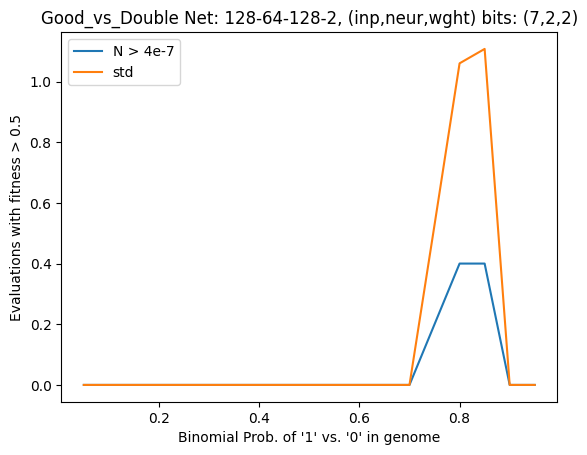

In [1089]:
if First:
    
    plt.plot(prob_tst[0],prob_tst[1], label="N > 4e-7")
    plt.plot(prob_tst[0],prob_tst[2], label="std")
    plt.xlabel("Binomial Prob. of '1' vs. '0' in genome")
    plt.ylabel(f"Evaluations with fitness > {typical_rand_fitness}")
    plt.title(NNstr)
    plt.legend()
    First = False


In [116]:
NNwgth[0].shape

(64, 128)

In [297]:
fitness(rand_indi(),40)

0.0

# Setup GA

In [117]:
!pip install deap


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [118]:
import random
from deap import base, creator, tools, algorithms


In [819]:
# def selTournamentWithFitBracket(individuals, k, tournsize, toolbox, max_fitness = None, min_fitness = None):
#     selected = tools.selTournament(individuals, k, tournsize)
#     # 2) Replace low-fitness winners
#     for i, ind in enumerate(selected):
#         # DEAP stores fitness as a tuple (even for a single objective)
#         # If the individual has never been evaluated, fitness is invalid - treat as low.
#         if not ind.fitness.valid or (min_fitness and ind.fitness.values[0] < min_fitness) or (max_fitness and ind.fitness.values[0] > max_fitness):
#             # ---- create a brand-new random individual -----------------
#             new_ind = toolbox.individual()
#             # ---- (optional) evaluate it now ---------------------------
#             # If you want the algorithm to evaluate it later, just comment the line below.
#             # new_ind.fitness.values = toolbox.evaluate(new_ind)
#             # ---- replace the low-fit individual -----------------------
#             selected[i] = new_ind
#     return selected

def selTournamentWithFitBracket(individuals, k, tournsize, max_fitness = None, min_fitness = None):
    pop = tools.selTournament(individuals, k, tournsize)
    # 2) Replace low-fitness winners
    sub_pop = [ind for ind in pop if (min_fitness and ind.fitness.values[0] < min_fitness) or (max_fitness and ind.fitness.values[0] > max_fitness)]
    return sub_pop


In [859]:
def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, elites = 0, verbose=__debug__): # 

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])
    logbook.genlog = []

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)
    if len(halloffame) < elites:
        elites = len(halloffame)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        try:
            # Select the next generation individuals
            offspring = toolbox.select(population, len(population))
        
            # Vary the pool of individuals
            offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)
            if len(population)>len(offspring):
                fillers = algorithms.varAnd(offspring[:], toolbox, cxpb, mutpb)[:len(population)-len(offspring)]
                offspring.extend(fillers)
    
    
            # Evaluate the individuals with an invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit
    
            # Update the hall of fame with the generated individuals
            if halloffame is not None:
                halloffame.update(offspring)
            if elites > 0:
                offspring = offspring[:-elites]
                offspring.extend(halloffame.items[:elites])
            
            # Replace the current population by the offspring
            population[:] = offspring
            
            # if elites > 0 and elites <= len(population) and elites <= len(hof):
            #     population[-elites:] = halloffame[:]
    
            # Append the current generation statistics to the logbook
            record = stats.compile(population) if stats else {}
            logbook.record(gen=gen, nevals=len(invalid_ind), **record)
            logbook.genlog.append(tools.selBest(population, 1)[0])
            if verbose:
                print(logbook.stream)
        except Exception as e:
            print(f"Interrupted by {e}; current gen: {gen}")

    return population, logbook

In [855]:
def eval_size(individual):
    zero_genes = np.sum( [len(np.where( np.ravel( i )==0)[0]) for i in conv_from_indi_to_wght(individual)] )
    return zero_genes  / ( len(individual)/2)


In [1106]:
import time
from dateutil.relativedelta import relativedelta
time.time()

import multiprocessing
pool = multiprocessing.Pool(12)


# --- Constants ---
GENOME_LENGTH = npSegm[-1]
POP_SIZE = 300
CXPB = 0.7  # Crossover probability
MUTPB = 4 / GENOME_LENGTH  # Mutation probability per bit
NGEN = 20  # Number of generations
TOURN_SIZE = 5
ELITE_SIZE = 0  #2
HOF_SIZE = 3 # NGEN
FIT_TESTS = 50
FIT_TYPICAL = np.median([fitness(rand_indi_custom(0.5)) for i in range(3)])


POP_SIZE += ELITE_SIZE

# --- Evaluation Function ---
def evaluate(individual):
    fit, div = fitness(individual, FIT_TESTS)
    siz = eval_size(individual)
    return  fit, div, siz 


time_start = time.time()
def time_elapsed(pop):
    time_diff = time.time() - time_start # seconds
    rd = relativedelta(seconds=time_diff)
    years = f'{int(rd.years)} y, ' if rd.years > 0 else ''
    months = f' {int(rd.months)} mon, ' if rd.months > 0 else ''
    days = f' {int(rd.days)} d' if rd.days > 0 else ''
    hours = f' {int(rd.hours)} h' if rd.hours > 0 else ''
    mins = f' {int(rd.minutes)} m' if rd.minutes > 0 else ''
    secs = f' {int(rd.seconds)} s' if rd.seconds > 0 else ''
    t =  f'{years}{months}{days}{hours}{mins}{secs}'
    return t.rjust(15)
    # return repr(rd)
    # return time_diff

def diversity(pop):
    """Return the fraction of unique genotypes in the population."""
    unique = len({ind for ind in pop})
    return unique / len(pop)

# def first_indi(pop):
#     for i in pop:
#         return "".join(str(i))

# --- Fitness and Individual ---
if "creator" in globals():
    if hasattr(creator, "FitnessMaxSmall"):
        del creator.FitnessMaxSmall
    if hasattr(creator, "FitnessMin"):
        del creator.FitnessMin
    if hasattr(creator, "FitnessMax"):
        del creator.FitnessMax
    if hasattr(creator, "Individual"):
        del creator.Individual

# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMin)
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

creator.create("FitnessMaxSmall", base.Fitness, weights=(1.0,0.1,0.1))
creator.create("Individual", list, fitness=creator.FitnessMaxSmall)

# --- Toolbox Setup ---
toolbox = base.Toolbox()
# toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("attr_bool", np.random.binomial, 1, 0.8)
# toolbox.register("attr_bool", np.random.binomial, 1, 0.25)

def rand_indi_prod():
    return rand_indi_segmented( [0.65, 0.8] )

toolbox.register("attr_bool_segmented", rand_indi_prod)


# toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, GENOME_LENGTH)
# toolbox.register("individual", tools.initCycle, creator.Individual, 
#                  (toolbox.attr_bool_bnml_hi, toolbox.attr_bool_bnml_lo), 
#                  n=GENOME_LENGTH//2
#                 )


toolbox.register("proto", tools.initRepeat, creator.Individual, toolbox.attr_bool, GENOME_LENGTH)

def individual_with_retries(generator, fitness_func, typ_fitness, retries=7):
    best_ind = None
    best_fit = float("inf")
    for i in range(retries + 1):
        ind = generator() #toolbox.proto()
        fit = fitness_func(ind) 
        if fit < best_fit:
            best_fit = fit
            best_ind = ind
            best_ind.fitness.values = (fit,0)
        # if best_fit >= min_fitness:
        if best_fit != typ_fitness:
            print(f"{fit:g} ", end='' )
            break
    return best_ind

# toolbox.register("individual", individual_with_retries, toolbox.proto, fitness, typ_fitness=FIT_TYPICAL, retries=7)



toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_bool_segmented)



toolbox.register("population", tools.initRepeat, list, toolbox.individual)


toolbox.register("evaluate", evaluate)

toolbox.register("mate", tools.cxUniform, indpb=0.5)
# toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=MUTPB)
toolbox.register("select", tools.selTournament, tournsize=TOURN_SIZE) 
# toolbox.register("select", selTournamentWithFitBracket, tournsize=3, toolbox=toolbox, max_fitness = 0.99) 
# toolbox.register("select", selTournamentWithFitBracket, tournsize=3, min_fitness = 1.001) 

# --- Main GA Loop ---
def main():
    print("Create init population...")
    time_start = time.time()

    pop = toolbox.population(n=POP_SIZE)
    
    hof = tools.HallOfFame(HOF_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("max",  lambda x: round(max(x), 4))#max)
    stats.register("avg",  lambda x: round(np.mean(x), 3))
    stats.register("min",  lambda x: round(min(x), 4))#min)
    stats.register("diversity", lambda x: round(diversity(x), 3)) 
    # stats.register("first_indi", first_indi)
    stats.register("time", time_elapsed)

    # For second objective
    stats2 = tools.Statistics(lambda ind: ind.fitness.values[1])
    stats2.register("max",  lambda x: round(max(x), 3))
    # stats2.register("avg",  lambda x: round(np.mean(x), 3))
    # stats2.register("min",  lambda x: round(min(x), 3))
    
    # For third objective
    stats3 = tools.Statistics(lambda ind: ind.fitness.values[2])
    stats3.register("max",  lambda x: round(max(x), 3))
    # stats3.register("avg",  lambda x: round(np.mean(x), 3))
    # stats3.register("min",  lambda x: round(min(x), 3))
    
    # Combine
    mstats = tools.MultiStatistics(fitness=stats, divers=stats2, size=stats3)


    print("Start Algorithm...")
    # pop, log = algorithms.eaSimple(
    pop, log =  eaSimpleWithElitism(  
        pop, toolbox,
        cxpb=CXPB, 
        mutpb=1.0,  # mutpb=1.0 means each individual is mutated with MUTPB per bit
        ngen=NGEN,
        stats=mstats,
        halloffame=hof,
        elites=ELITE_SIZE,
        verbose=True
    )

    # algorithms.eaGenerateUpdate(toolbox, ngen=150, stats=stats, halloffame=hof)
    # pop, log = algorithms.eaGenerateUpdate(
    #     pop, toolbox,
    #     ngen=NGEN, 
    #     # evaluate=toolbox.parallel_evaluate,
    #     stats=stats, 
    #     halloffame=hof, 
    #     cxpb=CXPB, 
    #     mutpb=MUTPB,
    #     verbose=True
    # )

    
    return pop, log, hof
# if __name__ == "__main__":
    # main()

In [1107]:
verbose=False


In [1108]:

if "pop" in globals():
    del pop
if "log" in globals():
    del log
if "hof" in globals():
    del hof

toolbox.register("map", pool.map)

pop, log, hof = main()

# import datetime
# import pickle

# now_timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# # NN_descr = "-".join( [str(i) for i in NN] ) + f"__bitlen_neur-wght-bias_{neur_len}-{wght_len}-{bias_len}"
# filename = f"{now_timestamp_str}_log__{NNfile}.pkl"

# with open(filename, 'wb') as file:
#     pickle.dump(log, file)


Create init population...
Start Algorithm...
   	      	        divers        	                                fitness                                	         size         
   	      	----------------------	-----------------------------------------------------------------------	----------------------
gen	nevals	gen	max  	nevals	avg  	diversity	gen	max  	min 	nevals	time           	gen	max  	nevals
0  	300   	0  	0.955	300   	0.499	0.13     	0  	0.625	0.37	300   	       1 m 14 s	0  	0.087	300   
1  	300   	1  	0.935	300   	0.514	0.133    	1  	0.72 	0.4 	300   	       2 m 43 s	1  	0.087	300   
2  	300   	2  	0.982	300   	0.532	0.127    	2  	0.655	0.43	300   	       4 m 13 s	2  	0.087	300   
3  	300   	3  	0.946	300   	0.538	0.13     	3  	0.665	0.38	300   	       5 m 44 s	3  	0.086	300   
4  	300   	4  	0.949	300   	0.54 	0.13     	4  	0.695	0.405	300   	       7 m 16 s	4  	0.085	300   
5  	300   	5  	0.984	300   	0.536	0.133    	5  	0.645	0.41 	300   	       8 m 47 s	5  	0.086	300   
6 

In [843]:
tools.cxTwoPoint?

Signature: tools.cxTwoPoint(ind1, ind2)
Docstring:
Executes a two-point crossover on the input :term:`sequence`
individuals. The two individuals are modified in place and both keep
their original length.

:param ind1: The first individual participating in the crossover.
:param ind2: The second individual participating in the crossover.
:returns: A tuple of two individuals.

This function uses the :func:`~random.randint` function from the Python
base :mod:`random` module.
File:      ~/venv/lib/python3.12/site-packages/deap/tools/crossover.py
Type:      function

In [ ]:
fitness(tools.selBest(hof,1)[0])


In [863]:
hof

NameError: name 'hof' is not defined

In [ ]:
[i.fitness.wvalues for i in log.genlog]

In [ ]:
np.shape(pop)

In [ ]:
NNstr

In [1109]:
import datetime
import pickle

now_timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# NN_descr = "-".join( [str(i) for i in NN] ) + f"__bitlen_neur-wght-bias_{neur_len}-{wght_len}-{bias_len}"
filename = f"{now_timestamp_str}_log__{NNfile}.pkl"

log.hof = hof

with open(filename, 'wb') as file:
    pickle.dump(log, file)


In [1110]:
!ls -lart *.pkl | tail -n3 


-rwxr-xr-x. 1 i.bekman domänen-benutzer      577 Oct  7 01:25 20251007_012504_log__Good_vs_Double_NN_128-2__inp-neur-wght_bits__7-2-2.pkl
-rwxr-xr-x. 1 i.bekman domänen-benutzer      577 Oct  7 01:26 20251007_012629_log__Good_vs_Double_NN_128-2__inp-neur-wght_bits__7-2-2.pkl
-rwxr-xr-x. 1 i.bekman domänen-benutzer 16850238 Oct  7 14:25 20251007_142542_log__Good_vs_Double_NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl


In [677]:
import glob
glob.glob("*_log__*_128*.pkl")

['20250927_222446_log__NN_128-32-64-2__inp-neur-wght_bits__7-2-2.pkl',
 '20250928_185139_log__Good_vs_Double NN_128-32-64-2__inp-neur-wght_bits__7-2-2.pkl',
 '20250928_211053_log__Good_vs_Double NN_128-32-64-2__inp-neur-wght_bits__7-2-2.pkl',
 '20250929_230629_log__Good_vs_Double NN_128-32-128-2__inp-neur-wght_bits__7-2-2.pkl',
 '20250930_000841_log__Good_vs_Double NN_128-32-32-32-2__inp-neur-wght_bits__7-2-2.pkl',
 '20251001_093108_log__Good_vs_Double NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl',
 '20251002_063858_log__Good_vs_Double NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl',
 '20251002_092151_log__Good_vs_Double NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl',
 '20251003_061808_log__Good_vs_Double_NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl',
 '20251004_124612_log__Good_vs_Double_NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl',
 '20251004_224548_log__Good_vs_Double_NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl',
 '20251005_010219_log__Good_vs_Double_NN_128-64-128-2__inp-

In [128]:
import pickle

log_read = pickle.load(open("20251001_093108_log__Good_vs_Double NN_128-64-128-2__inp-neur-wght_bits__7-2-2.pkl",'rb'))
len(log_read), log_read.genlog[-1].fitness.wvalues

(51, (4.36, 0.0044531250000000005))

In [ ]:
log_read.genlog[-1].fitness.wvalues

# Observe result

In [ ]:
if NN[0] == 2048:
    plt.imshow(Train_D_good[0].reshape(128,-1).T, cmap='gray_r', interpolation='nearest', origin='lower')
    # plt.axis('off')  # Hide axes
    # plt.title('Black and White Image from Binary Array')
    plt.show()
    
    plt.imshow(Train_D_bad[1].reshape(128,-1).T, cmap='gray_r', interpolation='nearest', origin='lower')
    # plt.axis('off')  # Hide axes
    # plt.title('Black and White Image from Binary Array')
    plt.show()


In [ ]:
if NN[0] != 2048:
    plt.plot(Train_D_good[0])
    # plt.axis('off')  # Hide axes
    # plt.title('Black and White Image from Binary Array')
    plt.show()
    
    plt.plot(Train_D_bad[1])
    # plt.axis('off')  # Hide axes
    # plt.title('Black and White Image from Binary Array')
    plt.show()


In [ ]:
len(indi)
print(list(indi[:2048]))

In [296]:
indi = hof[0]
conv_from_indi_to_wght(indi)[0][0],conv_from_indi_to_wght(indi)[0][1],

(array([3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 3, 0, 3, 3, 0, 2, 3, 3,
        3, 2, 2, 0, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3,
        3, 3, 2, 1, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1,
        3, 0, 3, 3, 3, 3, 3, 2, 0, 2, 3, 3, 1, 3, 3, 3, 2, 2, 1, 1, 3, 3,
        3, 1, 3, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 2, 3], dtype=int8),
 array([2, 1, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 1,
        3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 0, 2, 3,
        1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2,
        3, 3, 2, 3, 2, 1, 1, 2, 0, 0, 3, 2, 3, 3, 3, 3, 1, 2, 2, 3, 0, 3,
        1, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 2, 2], dtype=int8))

In [ ]:
NN, npSegm

In [ ]:
len(hof)

In [ ]:
for i in range(len(hof)-1):
    neq = np.equal(hof[i],  hof[i+1])
    print(i,  len( np.where( (neq)==False )[0] ) )


In [315]:
indi = hof[0]

In [318]:
# Test_D

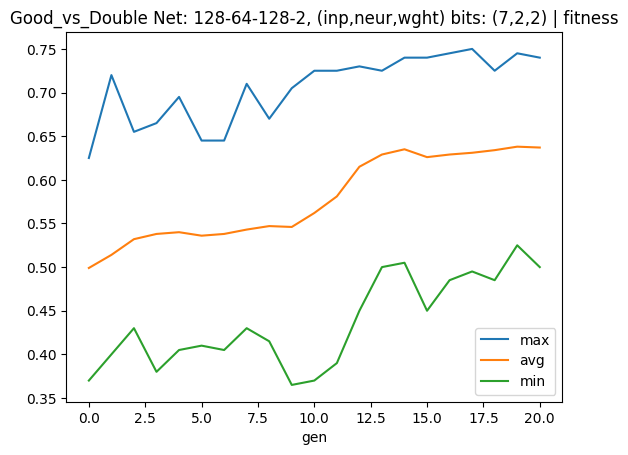

In [1114]:
pd.DataFrame(log.chapters['fitness']).plot("gen", ["max","avg","min"])
plt.title(NNstr + " | fitness")

import datetime

now_timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"{now_timestamp_str}_fitness_vs_gen__{NNfile}.png"
# plt.gcf().savefig(filename, dpi=100)

Text(0.5, 1.0, 'Good_vs_Double Net: 128-64-128-2, (inp,neur,wght) bits: (7,2,2) | size')

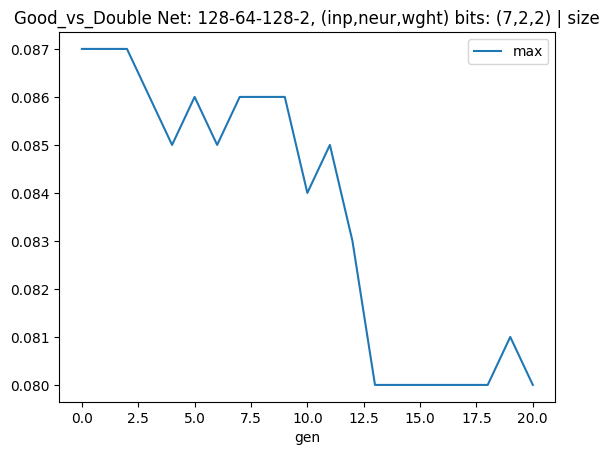

In [1115]:
pd.DataFrame(log.chapters['size']).plot("gen", ["max"])#,"avg","min"])
plt.title(NNstr + " | size")

In [1116]:
bins = np.linspace(0,1,21)

In [1117]:
Train_D_good, Train_D_bad = gen_Data(500,500)

len(Train_D_good), len(Train_D_bad)

(500, 500)

In [1118]:
# def fitness_view(indi):
if "hof" in globals():
    indi = hof[0]
else:
    indi = log_read.genlog[-1]
verbose = False
if indi is not None:
    Train_D_good, Train_D_bad = gen_Data(int(5000*0.70),int(5000*0.30))

    res_g = run_NN_from_indi(Train_D_good, indi)
    # res_g = np.apply_along_axis(func1d=run_NN, axis=1, arr=Train_D_good, pars=(conv_from_indi_to_wght(indi),conv_from_indi_to_summap(indi) ))
    # plt.hist( (np.float32(np.sum( res , axis=1))) , alpha=0.5,   label="Good")
    
    res_b = run_NN_from_indi(Train_D_bad, indi)
    # res_b = np.apply_along_axis(func1d=run_NN, axis=1, arr=Train_D_bad, pars=(conv_from_indi_to_wght(indi), conv_from_indi_to_summap(indi)))
    # return good + bad


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.5,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.5,
 1.0,
 0.5,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.0,
 0.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0

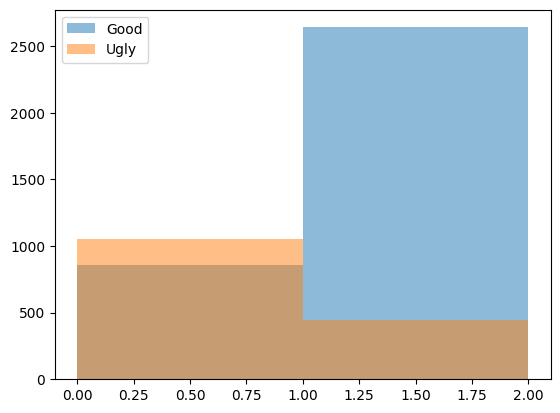

In [1124]:
plt.hist( [on_target(r,SiPM_NNout) for r in res_g] , alpha=0.5, bins=range(3),  label=SiPM_lbl)
plt.hist( [on_target(r,Nois_NNout) for r in res_b] , alpha=0.5, bins=range(3),   label=Nois_lbl)

plt.legend()


In [166]:
(np.uint16( np.all( res_g == [1,0] , axis=1) ).sum() + np.uint16( np.all( res_b == [0,1] , axis=1) ).sum()  ) / (len(res_g)+len(res_b))

0.6186

0.7545714285714286

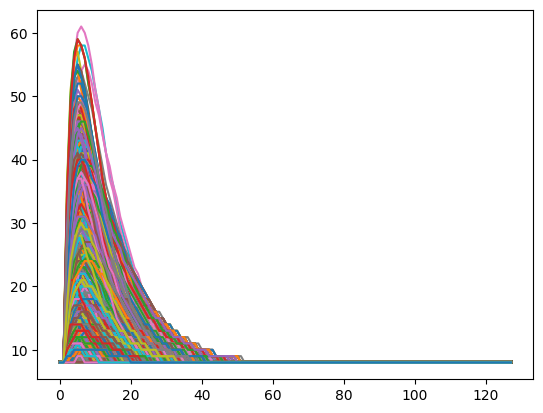

In [1133]:
# lD = zip( tuple_to_label(np.concatenate([res_g,res_b])), np.concatenate([Train_D_good, Train_D_bad]) )
lD = zip( tuple_to_label(res_g), Train_D_good )
good_nn = 0
for i in lD:
    l,D = i
    # plt.plot(D)
    if np.any(D<40) and l == 0:
        # print(l)
        plt.plot(D)
        good_nn +=1

good_nn/(len(res_g))#+len(res_b))

In [322]:
on_target(res_b,[0,1])/lenTrain_D_bad

# [on_target(r,[0,1]) for r in res_b]

68.48

In [323]:
SiPM_NNout

[1, 0]

In [1126]:
res_rand = run_NN_from_indi([rand_inp() for i in range(len(Train_D_good))], indi)

In [1125]:
rand = [fitness(rand_indi())[0] for i in range(10)]

Text(0.5, 1.0, 'Good_vs_Double Net: 128-64-128-2, (inp,neur,wght) bits: (7,2,2) with Training data')

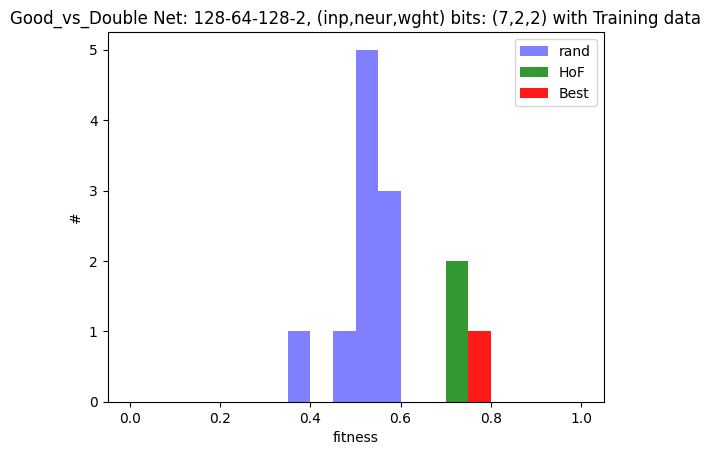

In [1127]:
bins = np.linspace(0,1,21)
plt.hist( rand                                                  ,bins=bins , alpha=0.5, color='blue' ,  label="rand")
plt.hist([hof[i].fitness.wvalues[0] for i in range(1,min(10,len(hof)))] ,bins=bins , alpha=0.8, color='green',  label="HoF")
plt.hist([hof[0].fitness.wvalues[0]]                            ,bins=bins , alpha=0.9, color='red'  ,  label="Best")
# plt.hist([test_fitness(rand_indi_custom(0.9)) for i in range(100)] ,bins=bins , alpha=0.5,     label="rand(0.9)")


plt.legend()
plt.xlabel("fitness")
plt.ylabel("#")
plt.title(NNstr + " with Training data")


In [878]:
tuple_to_label([[0,1],[1,0],[0,0]])

array([1, 0, 2])

In [1129]:
def confusion_matrix(y_true, y_pred, n_classes=3):
    """
    Compute a plain (non‑normalized) confusion matrix.

    Parameters
    ----------
    y_true : array‑like, shape (n_samples,)
        Ground‑truth class indices (0 … n_classes‑1).
    y_pred : array‑like, shape (n_samples,)
        Predicted class indices (same coding as y_true).
    n_classes : int, optional (default=2)
        Number of distinct classes.

    Returns
    -------
    cm : ndarray, shape (n_classes, n_classes)
        cm[i, j] = # of samples whose true label = i and predicted label = j
        (rows = true, columns = predicted)
    """
    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)

    cm = np.zeros((n_classes, n_classes), dtype=int)

    # Efficient vectorised counting:
    #   for each possible pair (i, j) we count how many times it appears.
    for i in range(n_classes):
        for j in range(n_classes):
            cm[i, j] = np.sum((y_true == i) & (y_pred == j))

    return cm


res = tuple_to_label( np.concatenate([res_g,res_b,res_rand]) )
tru = tuple_to_label( np.concatenate([[[1,0]]*len(res_g),[[0,1]]*len(res_b),[[1,1]]*len(res_rand)]) )
cm = confusion_matrix(res,tru)
cm# [0,0], res_g[0:10],res_b[0:10],

array([[2641,  632,    0],
       [ 452,  448,    0],
       [ 407,  420, 3500]])

In [880]:
len(Train_D_bad), len(Train_D_good)


(1500, 3500)

[[2641  632    0]
 [ 452  448    0]
 [ 407  420 3500]]
0 0 2641 Text(0, 0, '2641')
0 1 632 Text(0, 1, '632')
0 2 0 Text(0, 2, '0')
1 0 452 Text(1, 0, '452')
1 1 448 Text(1, 1, '448')
1 2 0 Text(1, 2, '0')
2 0 407 Text(2, 0, '407')
2 1 420 Text(2, 1, '420')
2 2 3500 Text(2, 2, '3500')


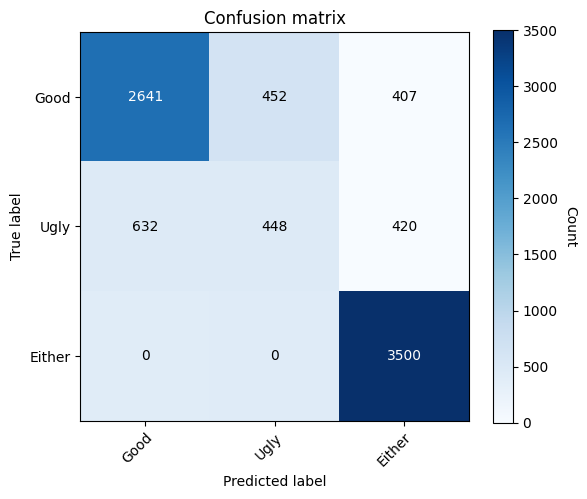

In [1130]:
def plot_confusion_matrix(cm,
                          class_names=["Good","Bad","Either"],
                          title='Confusion matrix',
                          cmap='Blues',
                          normalize=False,
                          figsize=(6, 5)):
    """
    Draw a confusion matrix with Matplotlib.

    Parameters
    ----------
    cm : ndarray, shape (n_classes, n_classes)
        The confusion matrix (raw counts or already normalized).
    class_names : list of str, optional
        Human readable names for each class.  If None, uses 0,1,… .
    title : str, optional
    cmap : str or Colormap, optional
        Colormap used for the heat‑map.
    normalize : bool, optional
        If True, each row is normalized to sum to 1 (i.e. per‑class recall).
    figsize : tuple, optional
    """
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    if normalize:
        # Avoid division by zero
        row_sums = cm.sum(axis=1, keepdims=True)
        cm_disp = np.divide(cm, row_sums, where=row_sums != 0)
    else:
        cm_disp = cm

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm_disp, interpolation='nearest', cmap=cmap)

    # Color‑bar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Normalized fraction' if normalize else 'Count',
                       rotation=-90, va="bottom")

    # Tick marks + labels
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=class_names,
        yticklabels=class_names,
        ylabel='True label',
        xlabel='Predicted label',
        title=title
    )

    # Rotate the x‑tick labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Annotate each cell with the numeric value
    thresh = cm_disp.max() / 2.0
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = cm_disp[i, j]
            r = ax.text(i, j, format(val, fmt),
                    ha="center", va="center",
                    color="white" if val > thresh else "black")
            print(i,j,format(val, fmt),r)

    fig.tight_layout()
    plt.show()

print(cm)
plot_confusion_matrix(cm, class_names=[SiPM_lbl,Nois_lbl,"Either"],)

In [1131]:
cm = confusion_matrix(tuple_to_label( run_NN_from_indi([rand_inp() for i in range(1000)], rand_indi()))  ,[2])
cm


array([[   0,    0,    0],
       [   0,    0,    0],
       [   0,    0, 1000]])

In [1132]:
cm = confusion_matrix(tuple_to_label( run_NN_from_indi([rand_inp() for i in range(1000)], indi))  ,[2])
cm


array([[   0,    0,    0],
       [   0,    0,    0],
       [   0,    0, 1000]])

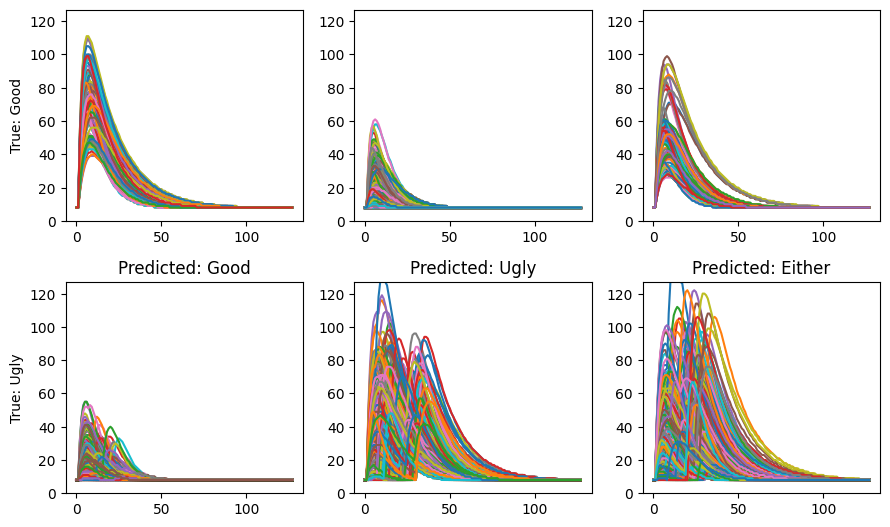

In [1134]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6*0.9))

# Access with axes[row, col], e.g.:
# axes[0, 0].plot([1, 2, 3], [1, 4, 9])

max_plts = 1000

cnt = 0
clplot = {1:[0,0], 0:[0,1], 2:[0,2]}
for i in zip(tuple_to_label(res_g[:max_plts]),Train_D_good[:max_plts]):
    # if i[0]==0:
        axes[*clplot[i[0]]].plot(i[1])

clplot = {0:[1,0], 1:[1,1], 2:[1,2]}
for i in zip(tuple_to_label(res_b[:max_plts]),Train_D_bad[:max_plts]):
    # if np.sum(i[0])==1:
        axes[*clplot[i[0]]].plot(i[1])

for i in range(2):
    for j in range(3):
        axes[i,j].set_ylim([0,127])

axes[0,0].set_ylabel("True: " + SiPM_lbl)
axes[1,0].set_ylabel("True: " + Nois_lbl)
axes[1,0].set_title("Predicted: " + SiPM_lbl)
axes[1,1].set_title("Predicted: " + Nois_lbl)
axes[1,2].set_title("Predicted: Either")
# axes[1,0].set_xlabel("Predicted: " + SiPM_lbl)
# axes[1,1].set_xlabel("Predicted: " + Nois_lbl)
# axes[1,2].set_xlabel("Predicted: Either")

plt.tight_layout()
plt.show()

In [ ]:
cnt = 0

for i in zip(res_g,Train_D_good):
    if tuple_to_label([i[0]]) != tuple_to_label([[1,0]]):
        plt.plot(i[1])
        cnt += 1
    if cnt == 10:
        break

In [ ]:
cnt = 0

for i in zip(res_b,Train_D_bad):
    if tuple_to_label([i[0]]) == tuple_to_label([[1,1]]):
        plt.plot(i[1])
        cnt += 1
    if cnt == 10:
        break

# Write to VHDL file

In [256]:

# del hof

In [1135]:
indi = None
if "hof" in globals():
    indi = hof[0]


In [1136]:
if "hof" in globals():
    indi = hof[0]
else:
    indi = rand_indi()

NNwgth = conv_from_indi_to_wght(indi)
# NNbias = conv_from_indi_to_bias(indi)
NNsummap = conv_from_indi_to_summap(indi)

## Open/Overwrite file

In [1137]:
VHD=open("../BNN_inst.vhd", "w")

In [1138]:
inp_len, "input_width"

(7, 'input_width')

In [1139]:
VHD_HEAD=f"""
library IEEE;
use IEEE.STD_LOGIC_1164.ALL;
use IEEE.NUMERIC_STD.ALL;

library work;
use work.BNN_pack.all;


entity BNN_forward is
    Port (
    input_i : in std_logic_vector({NN[0]}*input_width-1 downto 0);
    output_o : out std_logic_vector({NN[-1]}-1 downto 0)
    );
end BNN_forward;

architecture arch_imp of BNN_forward is
"""

VHD.write(VHD_HEAD)
print(VHD_HEAD)
# VHD.close()
# !cat BNN_inst.vhd


library IEEE;
use IEEE.STD_LOGIC_1164.ALL;
use IEEE.NUMERIC_STD.ALL;

library work;
use work.BNN_pack.all;


entity BNN_forward is
    Port (
    input_i : in std_logic_vector(128*input_width-1 downto 0);
    output_o : out std_logic_vector(2-1 downto 0)
    );
end BNN_forward;

architecture arch_imp of BNN_forward is



In [1140]:
T=f"""
type t_NN_layout  is array (0 to {len(NN)}-1) of integer;
-- max index = width-1 
constant NN_width: t_NN_layout := ({", ".join([f"{i}-1" for i in NN])});
"""

VHD.write(T)
print(T)
# type t_sum_n3 is array (0 to NN_width(3) ) of neursum;
# signal sum_n3: t_sum_n3:= (others => (others => '0'));


# for L in list(range(len(NN)-1))+["f"]:
T=""




T+=f"type t_layer_n{0} is array (0 to NN_width({0}) ) of input_smpl;"
T+="\n"
T+=f"signal layer_n{0}: t_layer_n{0} := (others => (others => '0'));"
T+="\n"
T+="\n"


for L in range(1, len(NN)):
    T+=f"type t_sum_n{L} is array (0 to NN_width({L}) ) of neursum;"
    T+="\n"
    if True:
        T+=f"signal sum_n{L}: t_sum_n{L} := (others => (others => '0'));"
        T+="\n"
        T+=f"type t_layer_n{L} is array (0 to NN_width({L}) ) of neur;"
    T+="\n"
    T+=f"signal layer_n{L}: t_layer_n{L} := (others => (others => '0'));"
    T+="\n"
    # T+=f"type t_bias_n{L} is array (0 to NN_width({L}) ) of bias;"
    # T+="\n"

    T+="\n"


VHD.write(T)
print(T)

T="\n\n"
VHD.write(T)

for L in range(len(NN)-1):
    T+=f"type t_weight_n{L}_n{L+1} is array (0 to NN_width({L+1}) , 0 to NN_width({L}) ) of wght;"
    T+="\n"
VHD.write(T)
print(T)

T="\n\n"
VHD.write(T)


for L in range(1,len(NN)):
    T+=f"type t_summap_n{L} is array (0 to NN_width({L}) ) of neursum_map;"
    T+="\n"
VHD.write(T)
print(T)

T="\n\n"
VHD.write(T)





type t_NN_layout  is array (0 to 4-1) of integer;
-- max index = width-1 
constant NN_width: t_NN_layout := (128-1, 64-1, 128-1, 2-1);

type t_layer_n0 is array (0 to NN_width(0) ) of input_smpl;
signal layer_n0: t_layer_n0 := (others => (others => '0'));

type t_sum_n1 is array (0 to NN_width(1) ) of neursum;
signal sum_n1: t_sum_n1 := (others => (others => '0'));
type t_layer_n1 is array (0 to NN_width(1) ) of neur;
signal layer_n1: t_layer_n1 := (others => (others => '0'));

type t_sum_n2 is array (0 to NN_width(2) ) of neursum;
signal sum_n2: t_sum_n2 := (others => (others => '0'));
type t_layer_n2 is array (0 to NN_width(2) ) of neur;
signal layer_n2: t_layer_n2 := (others => (others => '0'));

type t_sum_n3 is array (0 to NN_width(3) ) of neursum;
signal sum_n3: t_sum_n3 := (others => (others => '0'));
type t_layer_n3 is array (0 to NN_width(3) ) of neur;
signal layer_n3: t_layer_n3 := (others => (others => '0'));




type t_weight_n0_n1 is array (0 to NN_width(1) , 0 to NN_widt

2

In [1141]:

# T=""
# for L in range(1,len(NN)):
#     T += f"constant bias_n{L}: t_bias_n{L} := (\n"
#     ll = L
    
#     for i in range(NN[L]):
#         # T += f"b\"{NNbias[L][i*2]}{NNbias[L][i*2+1]}\""  +  ("," if i < NN[L]-1 else "\n")
#         T += f"b\"{np.binary_repr(NNbias[L-1][i],2)}\""  +  (", " if i < NN[L]-1 else "\n")
        
#     T += ");\n" 
#     # T += "\n"
# print(T)

# T+="\n\n"
# VHD.write(T)



In [1142]:
NNwgth[0],NNwgth[1], NNwgth[0].ravel(), NN

(array([[2, 2, 2, ..., 1, 3, 2],
        [1, 3, 2, ..., 2, 0, 1],
        [0, 1, 3, ..., 2, 3, 1],
        ...,
        [3, 3, 2, ..., 3, 2, 3],
        [3, 0, 3, ..., 3, 1, 0],
        [3, 0, 3, ..., 3, 3, 3]], dtype=int8),
 array([[1, 3, 2, ..., 2, 3, 3],
        [3, 3, 3, ..., 3, 2, 1],
        [3, 1, 2, ..., 2, 3, 2],
        ...,
        [3, 3, 3, ..., 2, 3, 2],
        [3, 3, 3, ..., 2, 1, 3],
        [1, 3, 3, ..., 2, 3, 2]], dtype=int8),
 array([2, 2, 2, ..., 3, 3, 3], dtype=int8),
 (128, 64, 128, 2))

In [1143]:
T=""
for L in range(len(NN)-1):
    T = f"constant weight_n{L}_n{L+1}: t_weight_n{L}_n{L+1} := (\n"
    VHD.write(T)
    print(T)
    ll = L
    
    for o in range(NN[ll+1]):
        T = "("
        for i in range(NN[ll]):
            w=np.binary_repr(NNwgth[ll][o][i],2)
            T += f"b\"{w}\"" +  (", " if i < NN[ll]-1 else ")\n")
            # T += f"'{(NNwgth[L].ravel()[i*(NN[ll+1]) +o]+1)//2}'"  +  ("," if o < NN[ll+1]-1 else ")\n")
            # T += f"b\"{np.binary_repr(NNwgth[ll].ravel()[o*(NN[ll+1]) +i],2)}\" {o,i,o*(NN[ll]) +i}"  +  (", " if i < NN[ll+1]-1 else ")\n")
            # T += f"'{(NNwgth[L].ravel()[i*(NN[ll+1]) +o]+1)//2}'"  +  ("," if o < NN[ll+1]-1 else ")\n")
        
        T += ("," if o < NN[ll+1]-1 else ");") + "\n" 
        VHD.write(T)
        print(T)

    T = "\n"
    print(T)
    VHD.write(T)




T="\n\n"
VHD.write(T)
print(T)



constant weight_n0_n1: t_weight_n0_n1 := (

(b"10", b"10", b"10", b"10", b"11", b"00", b"00", b"11", b"10", b"11", b"00", b"01", b"11", b"11", b"11", b"11", b"10", b"11", b"11", b"01", b"01", b"11", b"01", b"11", b"10", b"01", b"01", b"11", b"11", b"01", b"10", b"11", b"11", b"10", b"01", b"10", b"00", b"01", b"00", b"11", b"11", b"01", b"01", b"10", b"01", b"11", b"11", b"11", b"10", b"11", b"10", b"01", b"11", b"10", b"01", b"11", b"11", b"01", b"01", b"11", b"11", b"10", b"11", b"00", b"11", b"10", b"01", b"10", b"01", b"11", b"01", b"11", b"01", b"11", b"01", b"11", b"11", b"01", b"11", b"00", b"00", b"10", b"11", b"11", b"11", b"01", b"11", b"00", b"11", b"11", b"01", b"11", b"11", b"01", b"01", b"11", b"01", b"10", b"01", b"10", b"11", b"00", b"01", b"10", b"11", b"10", b"01", b"01", b"11", b"11", b"00", b"11", b"11", b"01", b"10", b"01", b"10", b"00", b"11", b"11", b"10", b"10", b"01", b"01", b"01", b"01", b"11", b"10")
,

(b"01", b"11", b"10", b"11", b"01", b"00", b"00", b"01",

In [1144]:
NNsummap[0][0]

array([ 3451,  6902, 10353], dtype=uint32)

In [1145]:
# t_summap_n1
T=""
for L in range(1,len(NN)):
    T += f"constant summap_n{L}: t_summap_n{L} := ( "
    # for o in range(NN[L]):
    T += ','.join( [  f"({ ','.join( map(str,s)) })"  for s in NNsummap[L-1]] )
    # T += f"{'),\n('.join( map(str,s )) }"
    # T += f"{-int(NN[L]/2)} , {int(NN[L]/2)} , {int(NN[L]*3/2)}"       
    # T += f"{int(NN[L]*3*1/4)} , {int(NN[L]*3*1/2)} , {int(NN[L]*3*3/4)}"       
    
    T += ");\n" 
print(T)

T+="\n\n"
VHD.write(T)

"""
constant summap_n1 : neursum_map := ( -128/2, 128/2 , 128*3/2 );
constant summap_n2 : neursum_map := ( -60/2, 60/2 , 60*3/2 );
constant summap_n3 : neursum_map := ( -24/2, 24/2 , 24*3/2 );
"""
1

constant summap_n1: t_summap_n1 := ( (3451,6902,10353),(3153,6307,9460),(3272,6545,9817),(3332,6664,9996),(3361,6723,10085),(3332,6664,9996),(3421,6842,10263),(3391,6783,10174),(3361,6723,10085),(3421,6842,10263),(3242,6485,9728),(3510,7021,10531),(3272,6545,9817),(3540,7080,10620),(3540,7080,10620),(3332,6664,9996),(3421,6842,10263),(3332,6664,9996),(3213,6426,9639),(3183,6366,9549),(3332,6664,9996),(3540,7080,10620),(3332,6664,9996),(3480,6961,10442),(3213,6426,9639),(3361,6723,10085),(3570,7140,10710),(3332,6664,9996),(3451,6902,10353),(3421,6842,10263),(3213,6426,9639),(3242,6485,9728),(3332,6664,9996),(3213,6426,9639),(3242,6485,9728),(3421,6842,10263),(3421,6842,10263),(3391,6783,10174),(3361,6723,10085),(3213,6426,9639),(3361,6723,10085),(3272,6545,9817),(3242,6485,9728),(3153,6307,9460),(3451,6902,10353),(3302,6604,9906),(3272,6545,9817),(3451,6902,10353),(3361,6723,10085),(3421,6842,10263),(3361,6723,10085),(3510,7021,10531),(3213,6426,9639),(3242,6485,9728),(3391,6783,10174),

1

In [1146]:
T="\nattribute KEEP : string;\n"
T += f"{"" if keep_l[0] else "-- "}attribute KEEP of layer_n{0} : signal is \"TRUE\";\n"
for L in range(1,len(NN)-1):
    T += f"{"" if keep_l[L] else "-- "}attribute KEEP of layer_n{L} : signal is \"TRUE\";\n"
T += f"{"" if keep_l[len(NN)-1] else "-- "}attribute KEEP of layer_n{len(NN)-1} : signal is \"TRUE\";\n"

print(T)

T+="\n\n"
VHD.write(T)




attribute KEEP : string;
-- attribute KEEP of layer_n0 : signal is "TRUE";
-- attribute KEEP of layer_n1 : signal is "TRUE";
-- attribute KEEP of layer_n2 : signal is "TRUE";
-- attribute KEEP of layer_n3 : signal is "TRUE";



228

In [1147]:
T="\n\nbegin\n\n"
VHD.write(T)

9

In [1148]:
T=""
for n in range(NN[0]):
    if False:
        T += f"layer_n0({n}) <= input_i({n});-- & not input_i({n});\n"
        T += f"layer_n0({n}) <= input_i({n}) & not input_i({n});\n"
    else:
        T += f"layer_n0({n}) <= unsigned(  input_i({(n+1)*inp_len}-1 downto {n*inp_len}) ) ;\n"

T+="\n\n"

for n in range(NN[-1]):
    # output_o(0) <= '1' when unsigned( layer_n3(0) ) > 1 else '0';
    # output_o(1) <= '1' when unsigned( layer_n3(1) ) > 1 else '0';
    T += f"output_o({n}) <= layer_n{len(NN)-1}({n})(1);\n"
    # T += f"output_o({n+1}) <= layer_n{len(NN)-1}({n})(1);\n"

print(T)

T+="\n\n"
VHD.write(T)


layer_n0(0) <= unsigned(  input_i(7-1 downto 0) ) ;
layer_n0(1) <= unsigned(  input_i(14-1 downto 7) ) ;
layer_n0(2) <= unsigned(  input_i(21-1 downto 14) ) ;
layer_n0(3) <= unsigned(  input_i(28-1 downto 21) ) ;
layer_n0(4) <= unsigned(  input_i(35-1 downto 28) ) ;
layer_n0(5) <= unsigned(  input_i(42-1 downto 35) ) ;
layer_n0(6) <= unsigned(  input_i(49-1 downto 42) ) ;
layer_n0(7) <= unsigned(  input_i(56-1 downto 49) ) ;
layer_n0(8) <= unsigned(  input_i(63-1 downto 56) ) ;
layer_n0(9) <= unsigned(  input_i(70-1 downto 63) ) ;
layer_n0(10) <= unsigned(  input_i(77-1 downto 70) ) ;
layer_n0(11) <= unsigned(  input_i(84-1 downto 77) ) ;
layer_n0(12) <= unsigned(  input_i(91-1 downto 84) ) ;
layer_n0(13) <= unsigned(  input_i(98-1 downto 91) ) ;
layer_n0(14) <= unsigned(  input_i(105-1 downto 98) ) ;
layer_n0(15) <= unsigned(  input_i(112-1 downto 105) ) ;
layer_n0(16) <= unsigned(  input_i(119-1 downto 112) ) ;
layer_n0(17) <= unsigned(  input_i(126-1 downto 119) ) ;
layer_n0(18) <= 

7348

### Main layer calc

In [1149]:
L=0
T=""
T += f"calc_layer_n{L+1}:   for n{L+1} in 0 to NN_width({L+1}) generate\n"
T += f"sum_n{L+1}(n{L+1}) <= \n"
n2 = int( 2**np.ceil(np.log2(NN[L])) )
S=["" for i in range(n2+1)]
for i in range(n2+1):
    S[i] += "+"


for B in range( 1, int(np.log2(n2))+1 ):
    for i in range( int((n2+1)/(2**B))+1 ):
        S[i*(2**B)] = ")" + S[i*(2**B)] + "("
    
# print (S)

S[0] = S[0].split('+')[1]
S[-1] = S[-1].split('+')[0]
# print (S)


for i in range(NN[L]):
    T += f" {S[i]} \n inp_ws(layer_n{L}({i}),weight_n{L}_n{L+1}(n{L+1},{i})) \n"
for i in range(NN[L],n2):
    T += f" {S[i]} \n 0 \n"
T += f" {S[-1]};\n"
### nested sum with brackets


# T += f"layer_n{L+1}(n{L+1}) <= neur_b( neur_act( sum_n{L+1}(n{L+1}) , summap_n{L+1}), bias_n{L+1}(n{L+1}) );\nend generate;\n" 
T += f"layer_n{L+1}(n{L+1}) <= neur_act( sum_n{L+1}(n{L+1}) , summap_n{L+1}(n{L+1})) ;\nend generate;\n" 
T += "\n"
print(T)
VHD.write(T)


for L in range(1, len(NN)-1):
    T=""
    T += f"calc_layer_n{L+1}:   for n{L+1} in 0 to NN_width({L+1}) generate\n"
    T += f"sum_n{L+1}(n{L+1}) <= \n"
    n2 = int( 2**np.ceil(np.log2(NN[L])) )
    S=["" for i in range(n2+1)]
    for i in range(n2+1):
        S[i] += "+"
    
    
    for B in range( 1, int(np.log2(n2))+1 ):
        for i in range( int((n2+1)/(2**B))+1 ):
            S[i*(2**B)] = ")" + S[i*(2**B)] + "("
        
    # print (S)

    S[0] = S[0].split('+')[1]
    S[-1] = S[-1].split('+')[0]
    # print (S)

    
    # for i in range(NN[L]):
    #     T += f" {S[i]} \n {i} \n"
    # for i in range(NN[L],n2):
    #     T += f" {S[i]} \n {i}*0 \n"
    # T += f" {S[-1]}\n"
    # print(T)
    
    # break
    
    for i in range(NN[L]):
        T += f" {S[i]} \n neur_ws(layer_n{L}({i}),weight_n{L}_n{L+1}(n{L+1},{i})) \n"
    for i in range(NN[L],n2):
        T += f" {S[i]} \n 0 \n"
    T += f" {S[-1]};\n"
    ### nested sum with brackets


    # T += f"layer_n{L+1}(n{L+1}) <= neur_b( neur_act( sum_n{L+1}(n{L+1}) , summap_n{L+1}), bias_n{L+1}(n{L+1}) );\nend generate;\n" 
    T += f"layer_n{L+1}(n{L+1}) <= neur_act( sum_n{L+1}(n{L+1}) , summap_n{L+1}(n{L+1})) ;\nend generate;\n" 
    T += "\n"
    print(T)
    VHD.write(T)

T="\n\nend arch_imp;\n\n"
print(T)


VHD.write(T)




calc_layer_n1:   for n1 in 0 to NN_width(1) generate
sum_n1(n1) <= 
 ((((((( 
 inp_ws(layer_n0(0),weight_n0_n1(n1,0)) 
 + 
 inp_ws(layer_n0(1),weight_n0_n1(n1,1)) 
 )+( 
 inp_ws(layer_n0(2),weight_n0_n1(n1,2)) 
 + 
 inp_ws(layer_n0(3),weight_n0_n1(n1,3)) 
 ))+(( 
 inp_ws(layer_n0(4),weight_n0_n1(n1,4)) 
 + 
 inp_ws(layer_n0(5),weight_n0_n1(n1,5)) 
 )+( 
 inp_ws(layer_n0(6),weight_n0_n1(n1,6)) 
 + 
 inp_ws(layer_n0(7),weight_n0_n1(n1,7)) 
 )))+((( 
 inp_ws(layer_n0(8),weight_n0_n1(n1,8)) 
 + 
 inp_ws(layer_n0(9),weight_n0_n1(n1,9)) 
 )+( 
 inp_ws(layer_n0(10),weight_n0_n1(n1,10)) 
 + 
 inp_ws(layer_n0(11),weight_n0_n1(n1,11)) 
 ))+(( 
 inp_ws(layer_n0(12),weight_n0_n1(n1,12)) 
 + 
 inp_ws(layer_n0(13),weight_n0_n1(n1,13)) 
 )+( 
 inp_ws(layer_n0(14),weight_n0_n1(n1,14)) 
 + 
 inp_ws(layer_n0(15),weight_n0_n1(n1,15)) 
 ))))+(((( 
 inp_ws(layer_n0(16),weight_n0_n1(n1,16)) 
 + 
 inp_ws(layer_n0(17),weight_n0_n1(n1,17)) 
 )+( 
 inp_ws(layer_n0(18),weight_n0_n1(n1,18)) 
 + 
 inp_ws(layer_n0(

17

In [1150]:
# neur_ws(layer_n0(0),weight_n0_n1(0,n1)) 

In [1151]:
VHD.close()


## Finished VHDL

In [ ]:
import numpy as np

arr = np.random.randint(0, 128, size=128)

def wf_to_vhdl(arr):
    # Concatenate into one big binary string, MSB of each element first
    bitstring = "".join(f"{val:07b}" for val in arr[::-1])
    
    # Wrap to 80 chars per line for readability in VHDL
    lines = [bitstring[i:i+7*8] for i in range(0, len(bitstring), 7*8)]
    vhdl_str = "constant stimulus : std_logic_vector(895 downto 0) :=\n"
    vhdl_str += " &\n".join(f'  "{line}"' for line in lines) + ";"
    print(arr)
    print(vhdl_str)



In [ ]:
a = SiPM_inp()
wf_to_vhdl( a )


In [ ]:
conv_from_indi_to_wght(indi)[0]

In [ ]:
a = [8,8,22,32,38,42,45,46,46,45,44,42,41,39,37,35,33,32,30,28,27,25,24,23,21,20,19,18,18,17,16,15,15,14,14,13,13,12,12,11,11,11,11,10,10,10,10,10,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]
a = np.asarray(a)

In [ ]:
verbose = True
# run_NN_from_indi([a], indi)



def run_NN_verbose(inp, pars):
    global NN
    # NN, NNwgth, NNbias, NNsummap = pars
    NNwgth,NNsummap  = pars
    layer_ni = inp #layer_inp(inp)
    print(layer_ni)
    for i in range(0,len(NN)-1):
        layer_ni = calc_layer( layer_ni, i, NNwgth,  NNsummap)
        print(layer_ni)
    return output_o(layer_ni)

# run_NN(rand_inp(NN[0]), pars=(NNwgth,NNsummap)), \
verbose = True
# run_NN(rand_inp(NN[0]), pars=(NNwgth,conv_from_indi_to_summap(rand_indi()) )), \
run_NN_verbose(a, pars=(conv_from_indi_to_wght(indi),conv_from_indi_to_summap(indi) ))


In [ ]:
a = Nois_inp()
wf_to_vhdl( a )


run_NN_verbose(a, pars=(conv_from_indi_to_wght(indi),conv_from_indi_to_summap(indi) ))


In [ ]:
len( np.ones(NN[0]) ), len(  np.array(list(np.binary_repr(random.getrandbits( NN[0] ), width=NN[0])), dtype=np.uint8)    ) 

# End

### Neuron behaviour to HDL snippets

In [ ]:
import numpy as np

In [ ]:
## Outdated
# BNN_val = { 
#     -1: "10" ,
#      0: "00" ,
#      1: "01" ,
#      2: "11" ,
# }    
BNN_val = { 
     0: "00" ,
     1: "01" ,
     2: "10" ,
     3: "11" ,
}    
BNN_val[1]

In [ ]:
## Outdated
"""
# Bias
n + 00 => 00
n + 01 => n-1
n + 02 => n
n + 03 => n+1
"""


In [ ]:
## Outdated
def BNN_plus(a,b):
    plus_d = {
        frozenset({-1} ) : -1,
        frozenset({0} )  :  0,
        frozenset({1} )  :  1,
        frozenset({2} )  :  2,
        frozenset({-1,0} ) : -1,
        frozenset({-1,1} ) : 0,
        frozenset({-1,2} ) : 0,
        frozenset({0,1} )  :  1,
        frozenset({0,2} )  :  1,
        frozenset({1,2} )  :  2,    
    }
    return plus_d[frozenset({a,b} )]


def BNN_plus(a,b):
    plus_d = {
        frozenset({0} )    :  0,
        frozenset({1} )    :  1,
        frozenset({2} )    :  2,
        frozenset({3} )    :  3,
        frozenset({0,1} )  :  0,
        frozenset({0,2} )  :  1,
        frozenset({0,3} )  :  1,
        frozenset({1,2} )  :  2,
        frozenset({1,3} )  :  2,
        frozenset({2,3} )  :  3,    
    }
    return plus_d[frozenset({a,b} )]

BNN_plus(1,2)



In [ ]:
## Outdated

a = [-1,0,1,2]
a = [0,1,2,3]
# comb = []
for i in a:
    for o in a:
        # comb.append( frozenset([i,o]) )
        print("{: 2d}".format( BNN_plus(i,o) ), end="")
    print()
# frozenset(comb)

for i in a:
    for o in a:
        print(' when "{:s}{:s}" => res := "{:s}";'.format( BNN_val[i], BNN_val[o], BNN_val[BNN_plus(i,o)] ) )
